In [1]:
import os
import csv
import lightkurve as lk
from lightkurve import search_targetpixelfile
#import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
from tqdm import tqdm
import astropy.units as u
import pylab as plt
tpf = search_targetpixelfile('210998473', mission='K2',cadence='long').download()

SearchError: Failed to open the downloaded file (/Users/AllieMcCarthy/.lightkurve-cache/mastDownload/K2/ktwo210998473-c04_lc/ktwo210998473-c04_lpd-targ.fits.gz). The file was likely only partially downloaded. Please remove it from your disk and try again.

In [ ]:
tpf

In [ ]:
%matplotlib inline
tpf.plot(aperture_mask=tpf.pipeline_mask, mask_color='red')

In [ ]:
import matplotlib.pyplot as plt

user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc = user_lc.remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')
#plt.ylim(0.9,1.1)
print(user_lc.time)
print(user_lc.flux)

In [ ]:
user_lc.errorbar();

In [ ]:
p = user_lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
ax = p.plot(c='k');

In [ ]:
periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc, minimum_period=0.05, maximum_period =10)
periodogram.plot()
periodogram.period_at_max_power

In [ ]:
lc = tpf.to_lightcurve().normalize().remove_nans().remove_outliers()
clc = lc.correct(windows=10).remove_outliers().fill_gaps()
clc.plot(marker='o',linestyle='none')
bin_corrected_lc = clc.bin(50,method='median')
bin_corrected_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')

In [ ]:
periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

In [2]:
folded_lightcurve = clc.fold(periodogram.period_at_max_power.value)
folded_lightcurve.plot(marker='o',linestyle='none')

NameError: name 'clc' is not defined

In [3]:
bin_folded_lc = folded_lightcurve.bin(10,method='median')
bin_folded_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')

NameError: name 'folded_lightcurve' is not defined

In [13]:
corrector=lk.SFFCorrector(lc)
new_lc = corrector.correct(lc.centroid_col,lc.centroid_row)

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)


<Quantity 0.29232905 d>

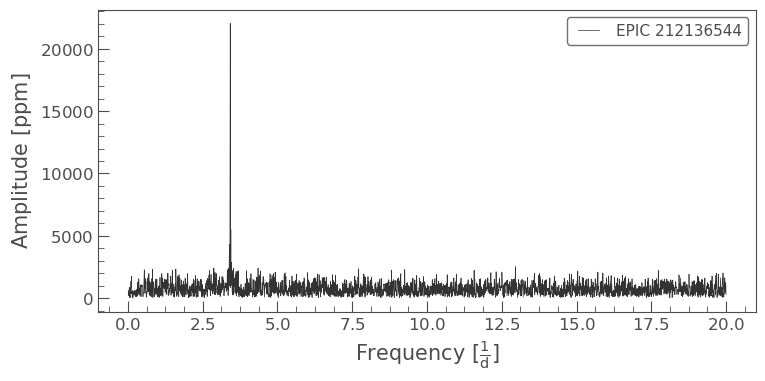

In [14]:
periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(new_lc, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

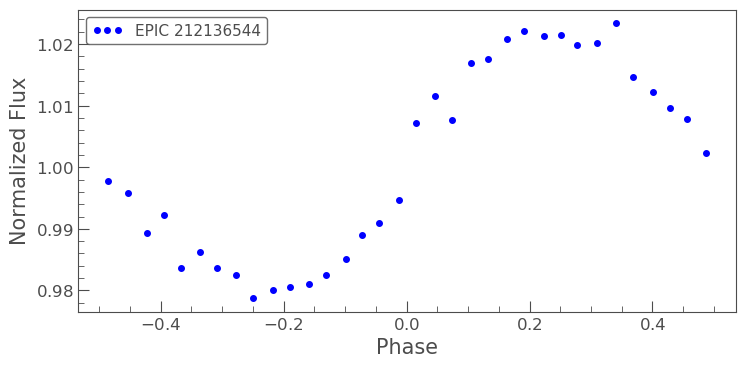

In [15]:
folded_lightcurve = new_lc.fold(periodogram.period_at_max_power.value)
bin_folded_lc = folded_lightcurve.bin(100,method='median')
bin_folded_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')

0.02171907977911035


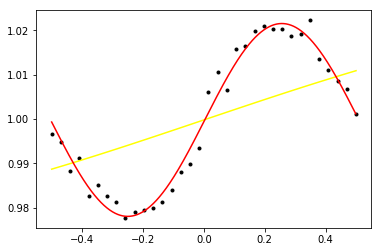

In [16]:
N = len(bin_folded_lc.flux) # number of data points
t = np.linspace(-0.5, 0.5, N)
guess_mean = np.mean(bin_folded_lc.flux)
guess_std = 3*np.std(bin_folded_lc.flux)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc.flux
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(-0.5,0.5,0.001)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
plt.plot(t, bin_folded_lc.flux, marker='.', linestyle='none', color='black')
plt.plot(t, data_first_guess, label='first guess', color='yellow')
plt.plot(fine_t, data_fit, label='after fitting', color='red')
print(est_amp)

In [89]:
### THIS IS THE SEPARATION PART OF THE CODE ###


first_time=[]
second_time=[]
third_time=[]
fourth_time=[]
fifth_time=[]
sixth_time=[]
seventh_time=[]
eighth_time=[]
ninth_time=[]
tenth_time=[]
first_flux=[]
second_flux=[]
third_flux=[]
fourth_flux=[]
fifth_flux=[]
sixth_flux=[]
seventh_flux=[]
eighth_flux=[]
ninth_flux=[]
tenth_flux=[]

row=0
first_day=user_lc.time[0]
num_data=user_lc.time.size
last_day=user_lc.time[num_data-1]
print(first_day)
print(last_day)
num_days=last_day-first_day
print(num_days)
sep_length=num_days/10
print(sep_length)


first_day=clc.time[0]
num_data=clc.time.size
last_day=clc.time[num_data-1]
print(first_day)
print(last_day)
num_days=last_day-first_day
print(num_days)
sep_length=num_days/10
print(sep_length)

len(clc.time)

print( first_day+sep_length)

2306.610483948869
2381.4315822801145
74.8210983312456
7.482109833124559
2306.610483948869
2381.4315822801145
74.8210983312456
7.482109833124559
2314.0925937819934


In [90]:
for i in clc.time:
    if (i<(first_day+sep_length)):
        first_time.append(i)
        first_flux.append(clc.flux[row])
    if (i>(first_day+sep_length)) and (i<(first_day+2*sep_length)):
        second_time.append(i)
        second_flux.append(clc.flux[row])
    if (i>(first_day+2*sep_length)) and (i<(first_day+3*sep_length)):
        third_time.append(i)
        third_flux.append(clc.flux[row])
    if (i>(first_day+3*sep_length)) and (i<(first_day+4*sep_length)):
        fourth_time.append(i)
        fourth_flux.append(clc.flux[row])
    if (i>(first_day+4*sep_length)) and (i<(first_day+5*sep_length)):
        fifth_time.append(i)
        fifth_flux.append(clc.flux[row])
    if (i>(first_day+5*sep_length)) and (i<(first_day+6*sep_length)):
        sixth_time.append(i)
        sixth_flux.append(clc.flux[row])
    if (i>(first_day+6*sep_length)) and (i<(first_day+7*sep_length)):
        seventh_time.append(i)
        seventh_flux.append(clc.flux[row])
    if (i>(first_day+7*sep_length)) and (i<(first_day+8*sep_length)):
        eighth_time.append(i)
        eighth_flux.append(clc.flux[row])
    if (i>(first_day+8*sep_length)) and (i<(first_day+9*sep_length)):
        ninth_time.append(i)
        ninth_flux.append(clc.flux[row])
    if (i>(first_day+9*sep_length)) and (i<(first_day+10*sep_length)):
        tenth_time.append(i)
        tenth_flux.append(clc.flux[row])
    row=row+1

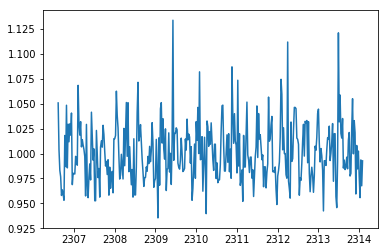

367


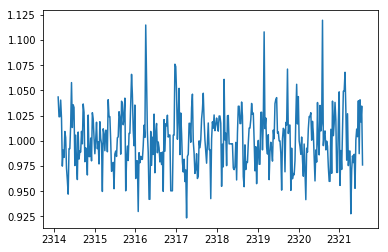

366


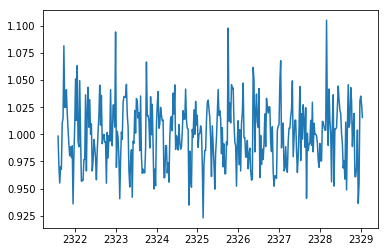

366


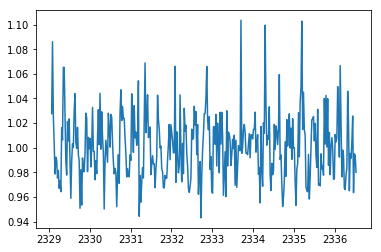

366


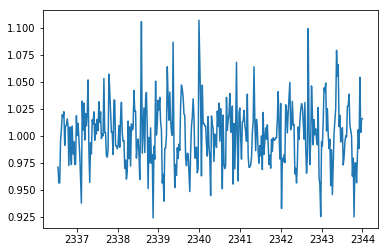

366


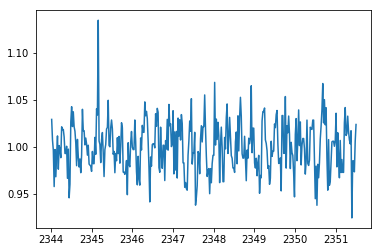

367


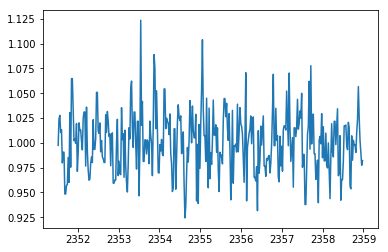

366


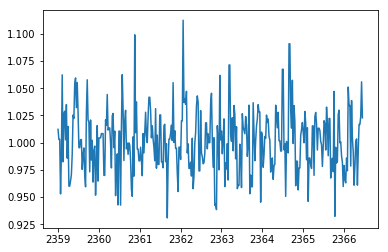

366


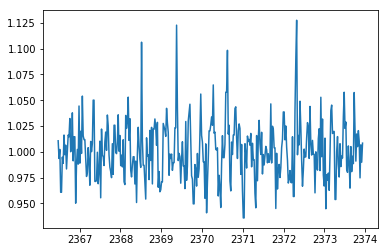

366


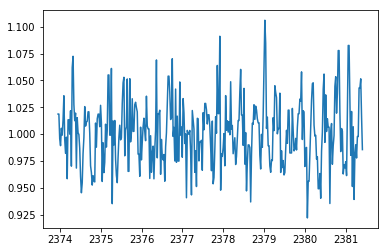

366


In [91]:
plt.plot(first_time,first_flux)
plt.show()
print(len(first_time))

plt.plot(second_time,second_flux)
plt.show()
print(len(second_time))

plt.plot(third_time,third_flux)
plt.show()
print(len(third_time))

plt.plot(fourth_time,fourth_flux)
plt.show()
print(len(fourth_time))

plt.plot(fifth_time,fifth_flux)
plt.show()
print(len(fifth_time))

plt.plot(sixth_time,sixth_flux)
plt.show()
print(len(sixth_time))

plt.plot(seventh_time,seventh_flux)
plt.show()
print(len(seventh_time))

plt.plot(eighth_time,eighth_flux)
plt.show()
print(len(eighth_time))

plt.plot(ninth_time,ninth_flux)
plt.show()
print(len(ninth_time))

plt.plot(tenth_time,tenth_flux)
plt.show()
print(len(tenth_time))



In [100]:

list_of_time_lengths=[len(first_time),len(second_time),len(third_time),len(fourth_time),len(fifth_time),len(sixth_time),len(seventh_time),len(eighth_time),len(ninth_time),len(tenth_time)]
print(list_of_time_lengths)

[367, 366, 366, 366, 366, 367, 366, 366, 366, 366]


1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10


IndexError: list index out of range

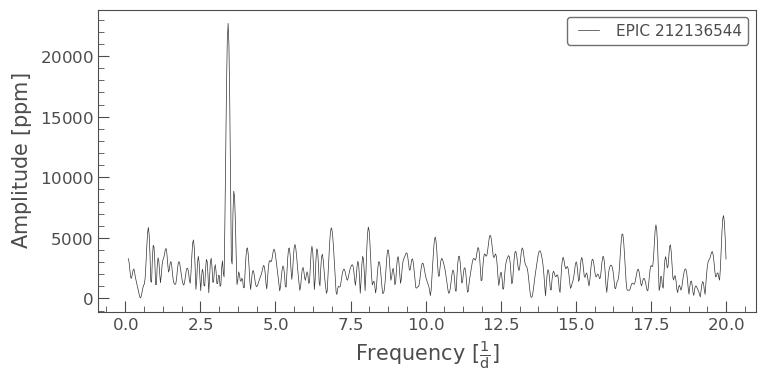

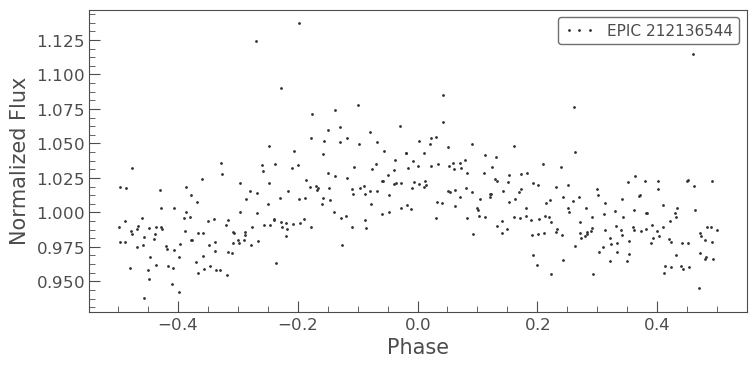

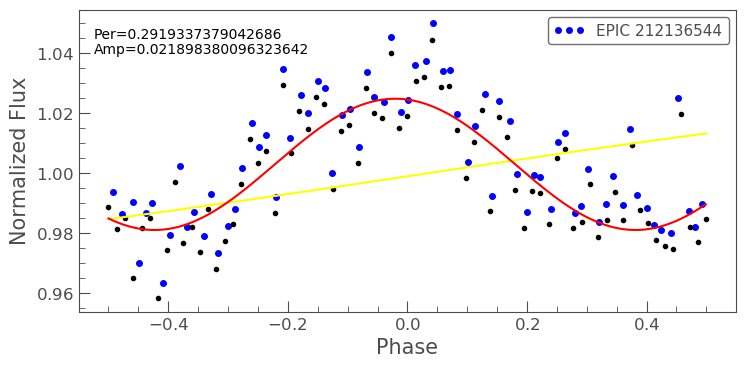

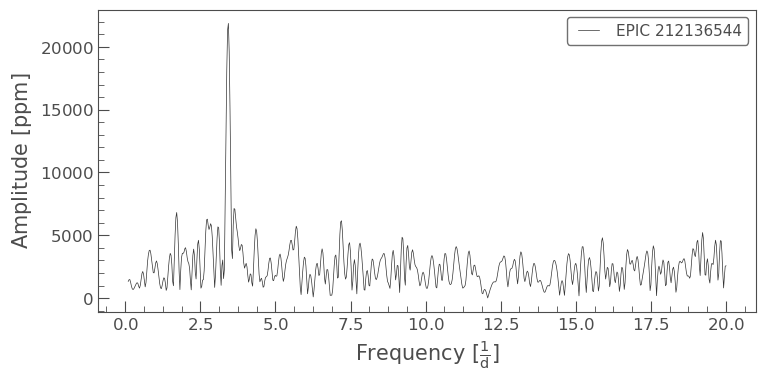

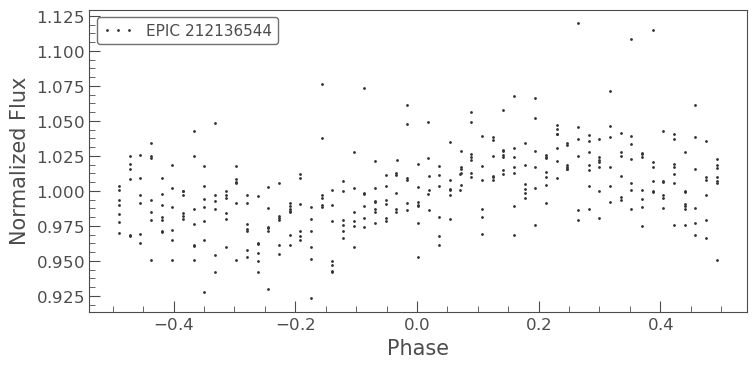

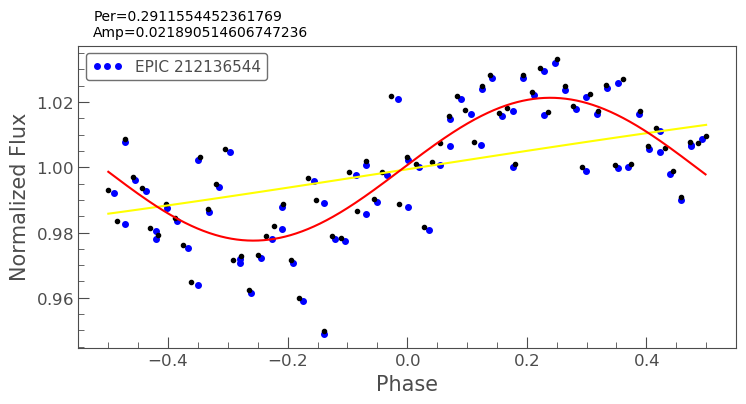

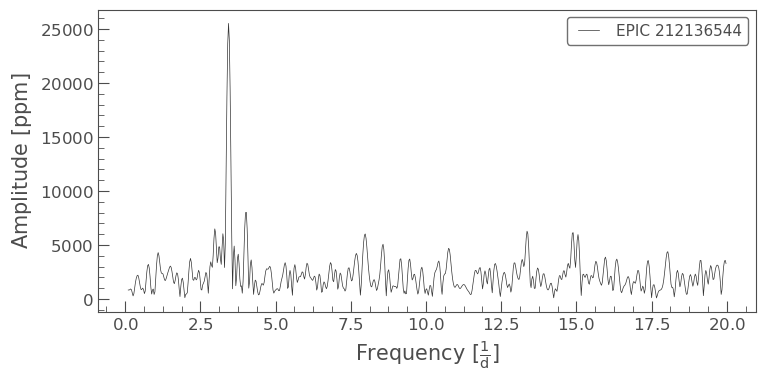

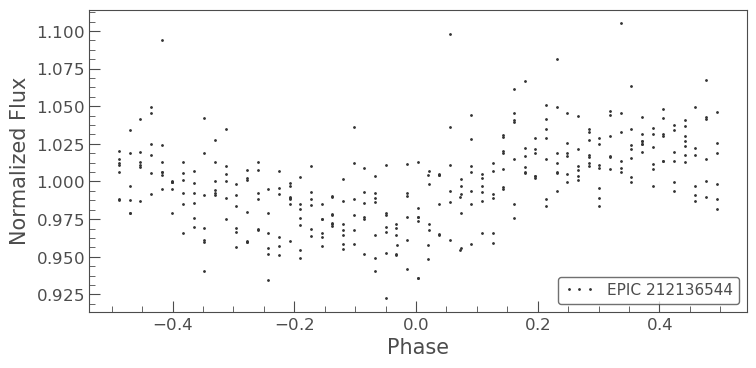

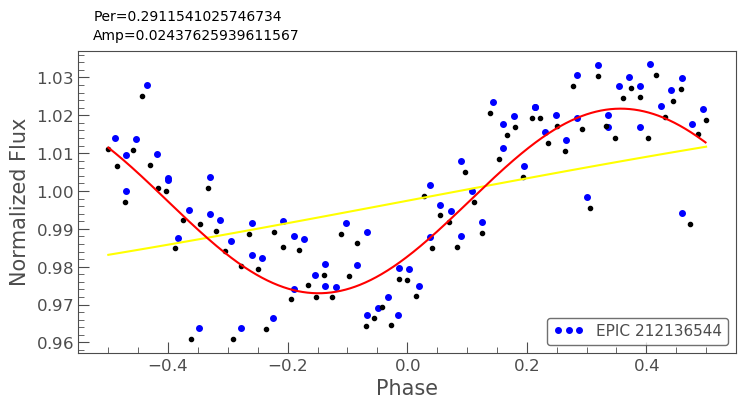

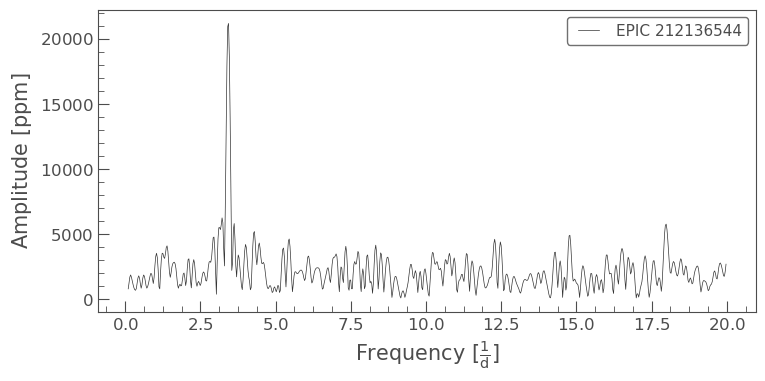

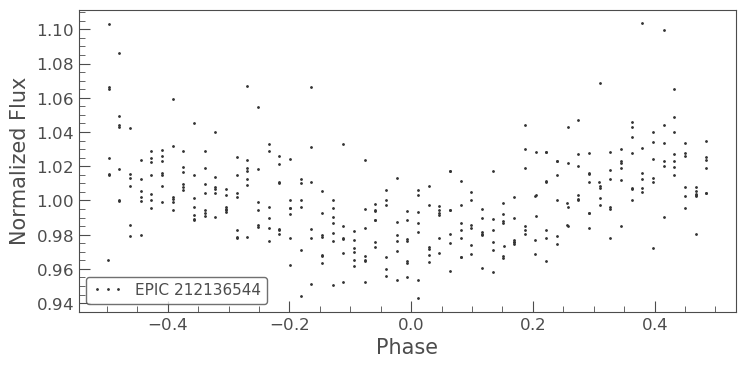

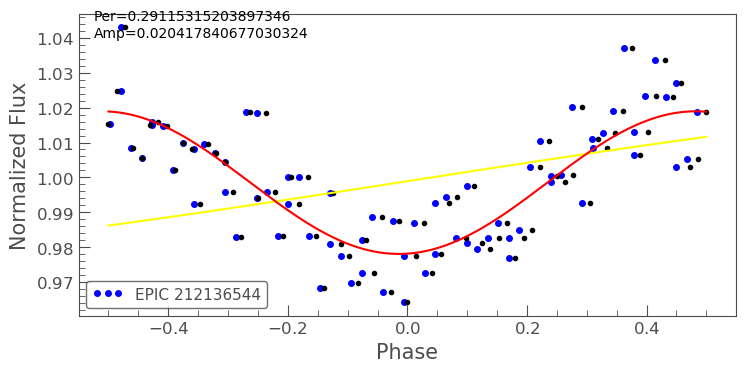

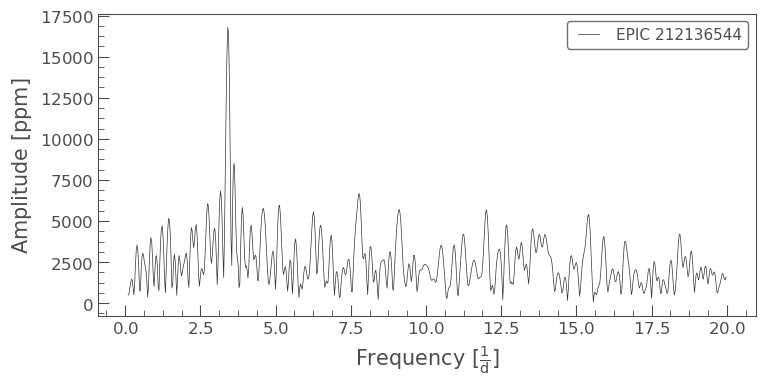

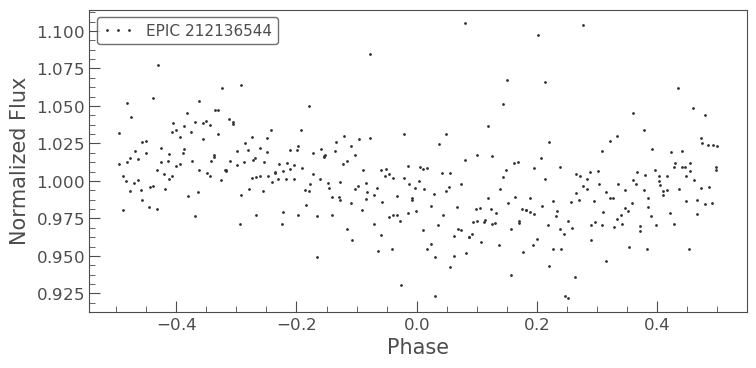

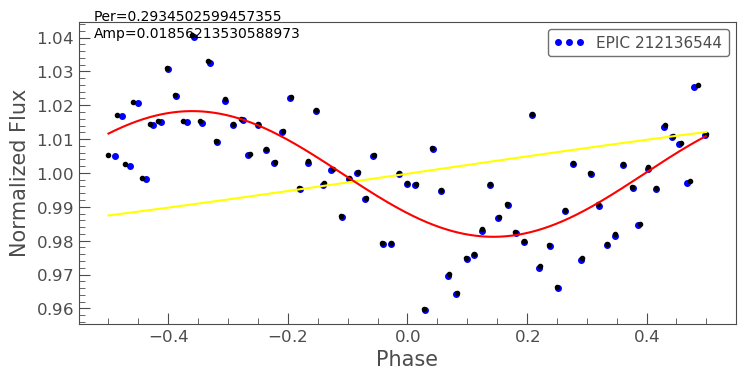

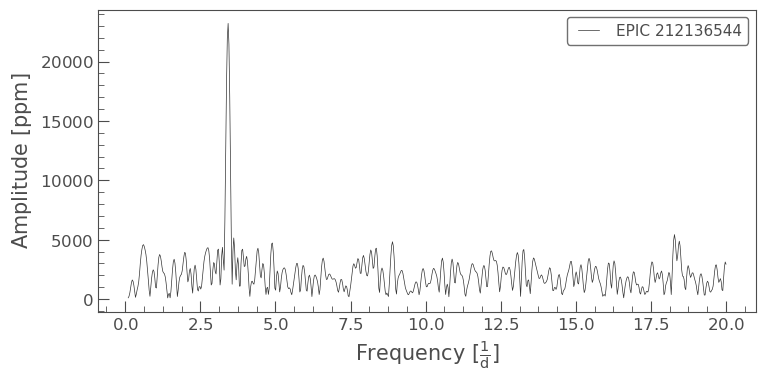

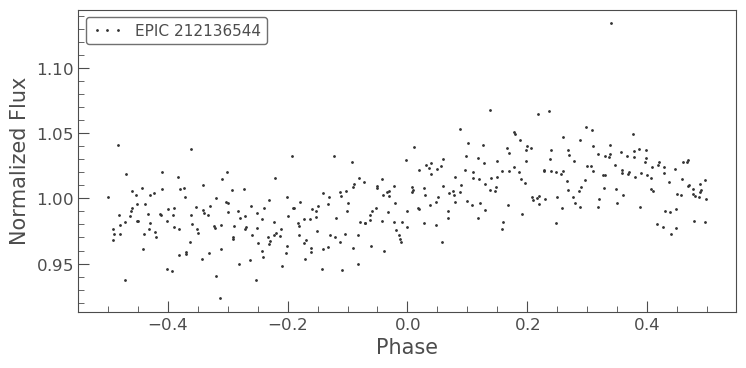

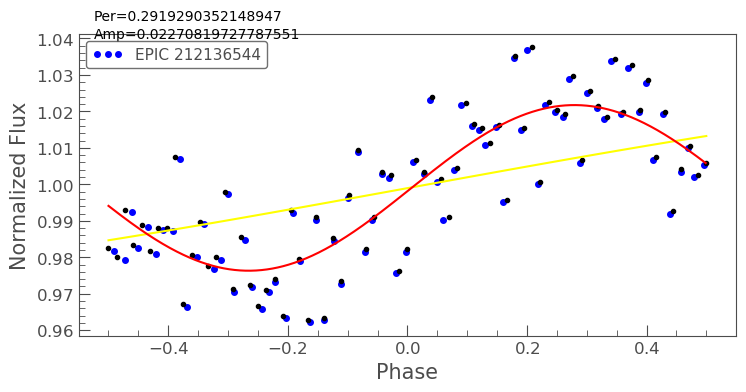

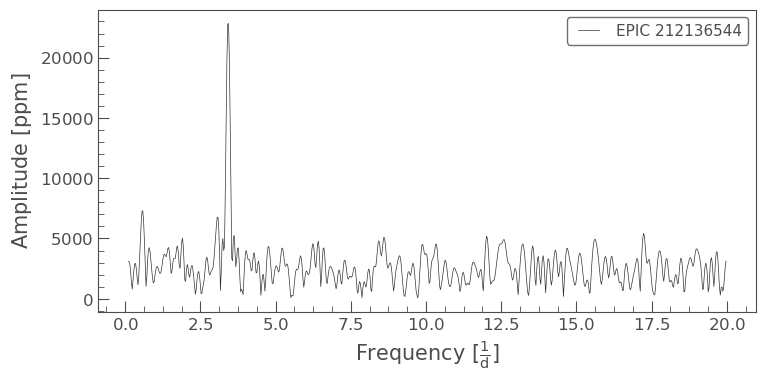

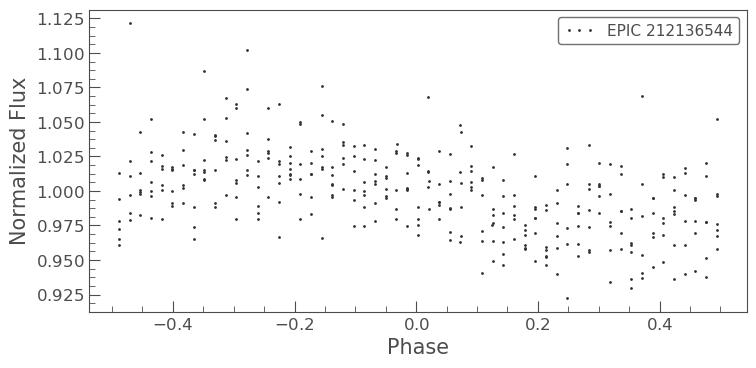

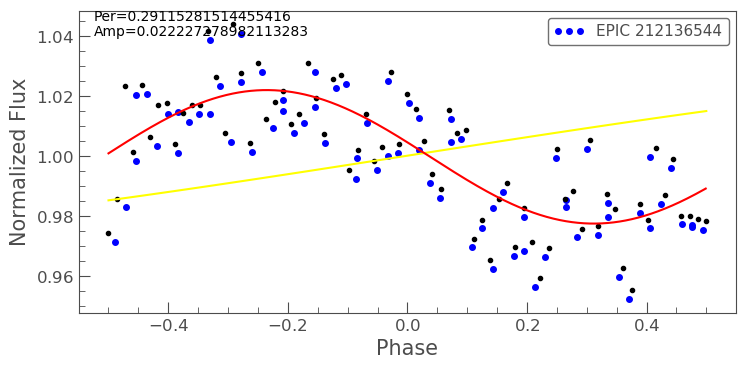

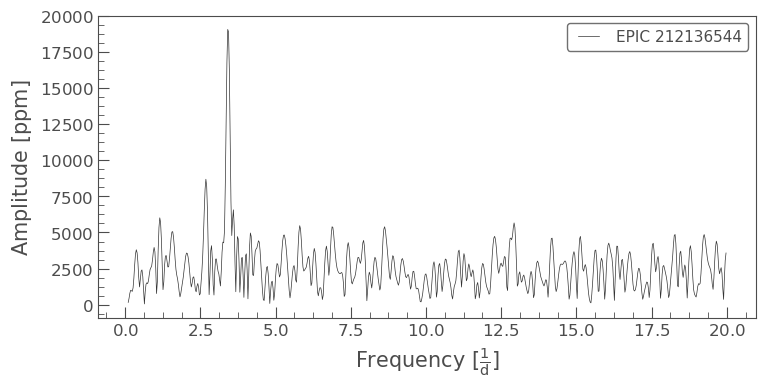

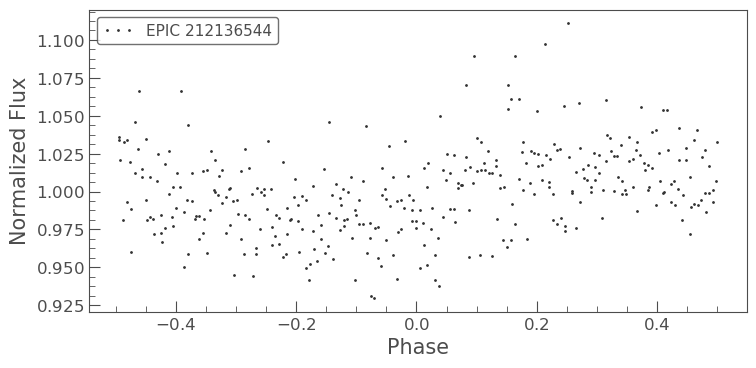

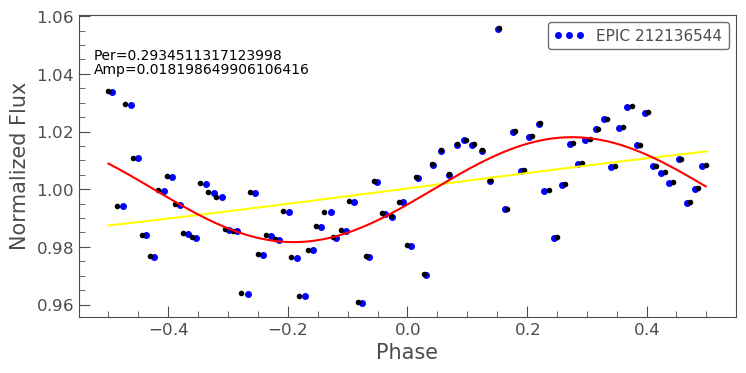

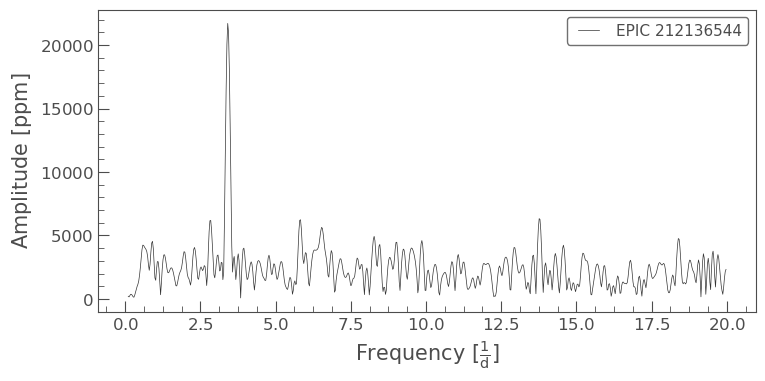

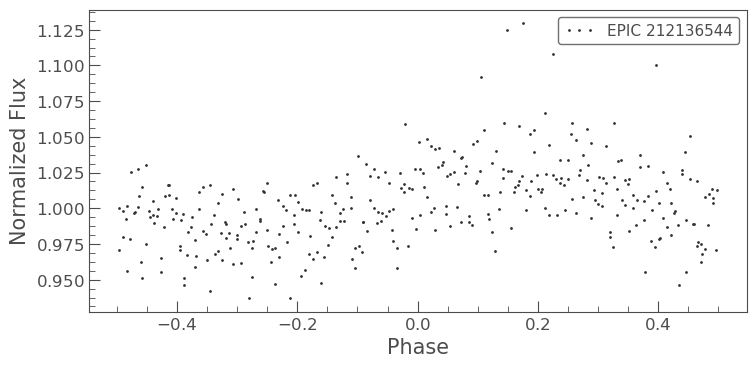

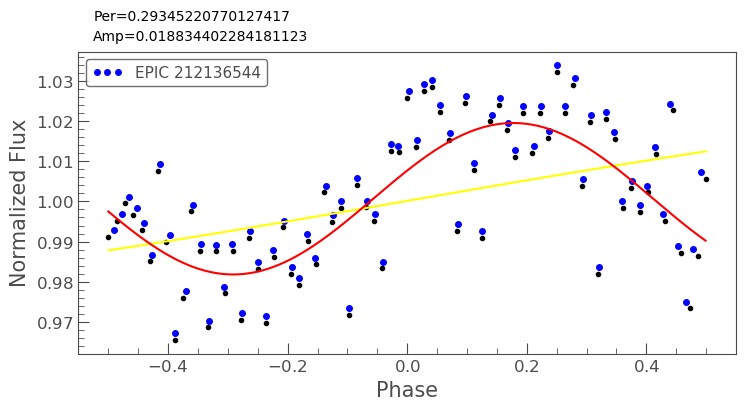

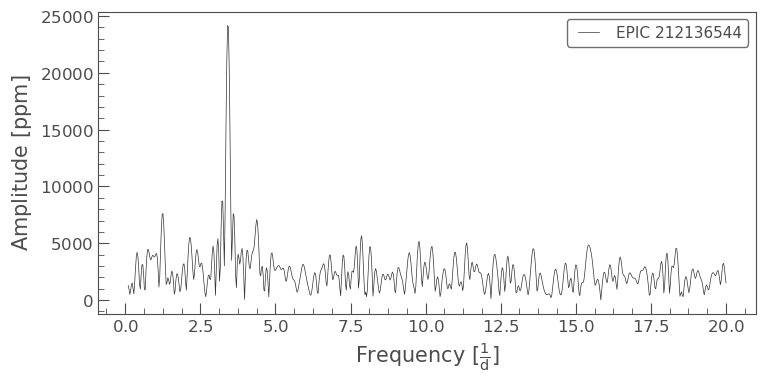

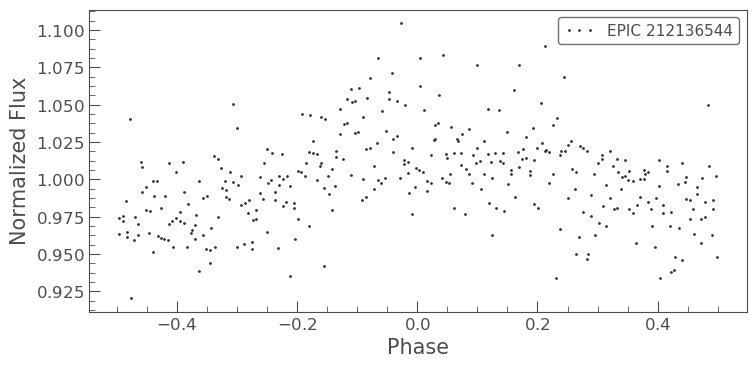

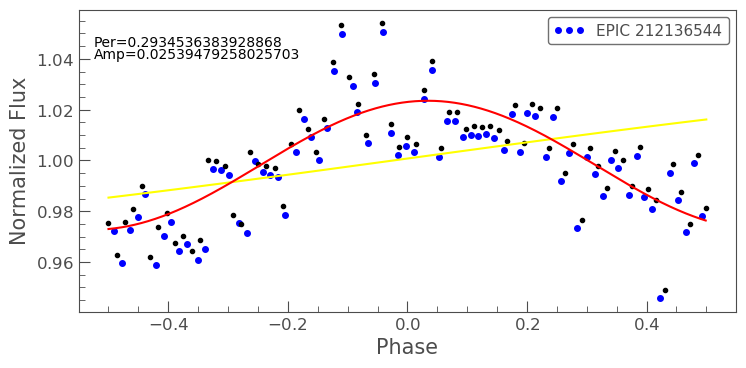

In [106]:
     x=1
     y=list_of_time_lengths[0]
     
     for i in range (1,11):
        
          print(i)
            
          periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[x:int(y)], minimum_period=0.05, maximum_period =10)
          periodogram.plot()
          periodogram.period_at_max_power

          folded_lightcurve = clc[x:int(y)].fold(periodogram.period_at_max_power.value)
          folded_lightcurve.plot(marker='o',linestyle='none')

          bin_folded_lc = folded_lightcurve.bin(5,method='median')
          bin_folded_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')

          N = len(bin_folded_lc.flux) # number of data points
          t = np.linspace(-0.5, 0.5, N)
          guess_mean = np.mean(bin_folded_lc.flux)
          guess_std = 3*np.std(bin_folded_lc.flux)/(2**0.5)/(2**0.5)
          guess_phase = 0
          guess_freq = 1
          guess_amp = 1
          data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
          optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc.flux
          est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
          data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
          fine_t = np.arange(-0.5,0.5,0.001)
          data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
          plt.plot(t, bin_folded_lc.flux, marker='.', linestyle='none', color='black')
          plt.plot(t, data_first_guess, label='first guess', color='yellow')
          plt.plot(fine_t, data_fit, label='after fitting', color='red')
          plt.text(-0.525,1.045,"Per=%s"%(periodogram.period_at_max_power.value))
          plt.text(-0.525,1.04,"Amp=%s"%(est_amp))

          x=x+list_of_time_lengths[i-1]
          y=y+list_of_time_lengths[i]
         
          print(i)
        

In [ ]:
### This is where I will take the separated days and create a periodogram for each ###

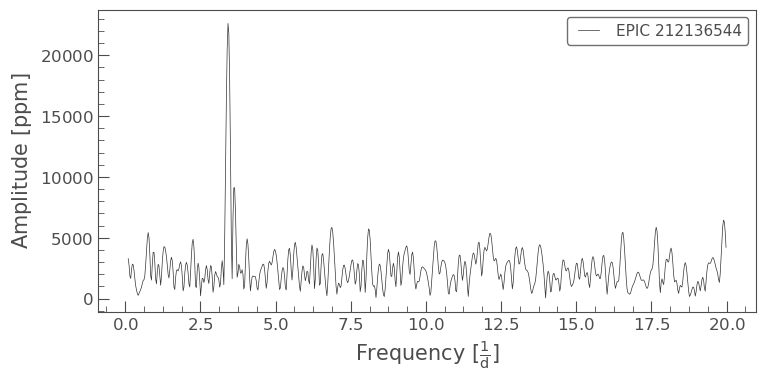

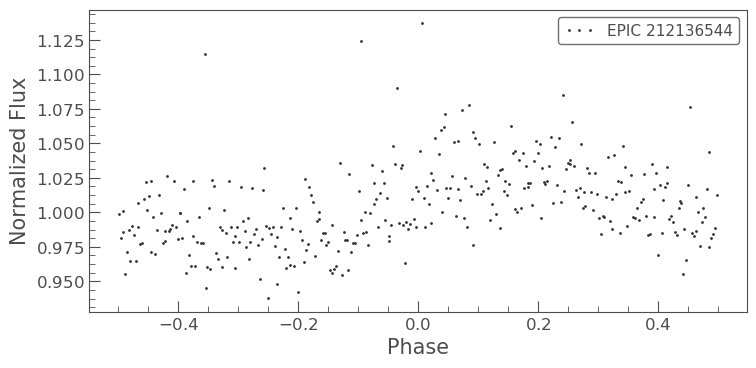

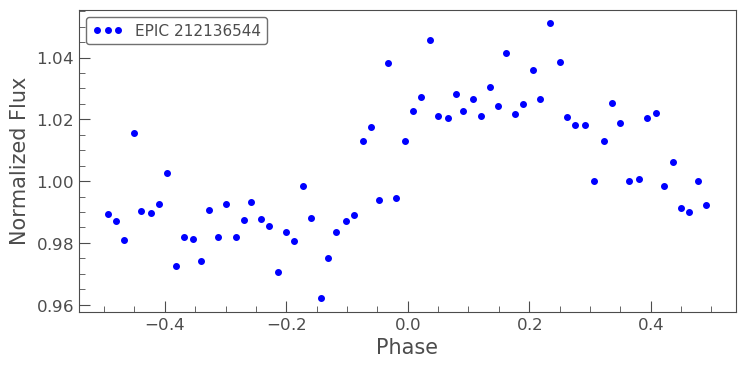

In [34]:
periodogramfirst=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[1:len(first_time)], minimum_period=0.05, maximum_period =10)
periodogramfirst.plot()
periodogramfirst.period_at_max_power

folded_lightcurve_first = clc[1:len(first_time)].fold(periodogramfirst.period_at_max_power.value)
folded_lightcurve_first.plot(marker='o',linestyle='none')

bin_folded_lc_first = folded_lightcurve_first.bin(5,method='median')
bin_folded_lc_first.plot(marker='o',linestyle='None',markersize=4,color='blue')

Text(-0.525,1.04,'Amp=0.02511087867729985')

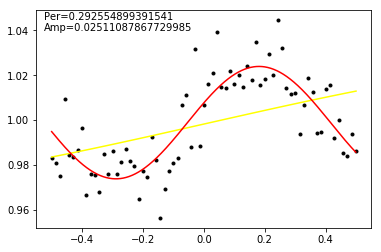

In [53]:
N_first = len(bin_folded_lc_first.flux) # number of data points
t_first = np.linspace(-0.5, 0.5, N_first)
guess_mean_first = np.mean(bin_folded_lc_first.flux)
guess_std_first = 3*np.std(bin_folded_lc_first.flux)/(2**0.5)/(2**0.5)
guess_phase_first = 0
guess_freq_first = 1
guess_amp_first = 1
data_first_guess_first = guess_std_first*np.sin(t_first+guess_phase_first) + guess_mean_first
optimize_func_first = lambda x: x[0]*np.sin(x[1]*t_first+x[2]) + x[3] - bin_folded_lc_first.flux
est_amp_first, est_freq_first, est_phase_first, est_mean_first = leastsq(optimize_func_first, [guess_amp_first, guess_freq_first, guess_phase_first, guess_mean_first])[0]
data_fit_first = est_amp_first*np.sin(est_freq_first*t_first+est_phase_first) + est_mean_first
fine_t_first = np.arange(-0.5,0.5,0.001)
data_fit_first=est_amp_first*np.sin(est_freq_first*fine_t_first+est_phase_first)+est_mean_first
plt.plot(t_first, bin_folded_lc_first.flux, marker='.', linestyle='none', color='black')
plt.plot(t_first, data_first_guess_first, label='first guess', color='yellow')
plt.plot(fine_t_first, data_fit_first, label='after fitting', color='red')
plt.text(-0.525,1.045,"Per=%s"%(periodogramfirst.period_at_max_power.value))
plt.text(-0.525,1.04,"Amp=%s"%(est_amp_first))


In [55]:
periodogramsecond=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[(len(first10time)+1):(len(first10time)+len(second10time))], minimum_period=0.05, maximum_period =10)
periodogramsecond.plot()
periodogramsecond.period_at_max_power

folded_lightcurve_second = clc[(len(first10time)+1):(len(first10time)+len(second10time))].fold(periodogramsecond.period_at_max_power.value)
folded_lightcurve_second.plot(marker='o',linestyle='none')

bin_folded_lc_second = folded_lightcurve_second.bin(10,method='median')
bin_folded_lc_second.plot(marker='o',linestyle='None',markersize=4,color='blue')

/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
N_second = len(bin_folded_lc_second.flux) # number of data points
t_second = np.linspace(-0.5, 0.5, N_second)
guess_mean_second = np.mean(bin_folded_lc_second.flux)
guess_std_second = 3*np.std(bin_folded_lc_second.flux)/(2**0.5)/(2**0.5)
guess_phase_second = 0
guess_freq_second = 1
guess_amp_second = 1
data_first_guess_second = guess_std_second*np.sin(t_second+guess_phase_second) + guess_mean_second
optimize_func_second = lambda x: x[0]*np.sin(x[1]*t_second+x[2]) + x[3] - bin_folded_lc_second.flux
est_amp_second, est_freq_second, est_phase_second, est_mean_second = leastsq(optimize_func_second, [guess_amp_second, guess_freq_second, guess_phase_second, guess_mean_second])[0]
data_fit_second = est_amp_second*np.sin(est_freq_second*t_second+est_phase_second) + est_mean_second
fine_t_second = np.arange(-0.5,0.5,0.001)
data_fit_second=est_amp_second*np.sin(est_freq_second*fine_t_second+est_phase_second)+est_mean_second
plt.plot(t_second, bin_folded_lc_second.flux, marker='.', linestyle='none', color='black')
plt.plot(t_second, data_first_guess_second, label='first guess', color='yellow')
plt.plot(fine_t_second, data_fit_second, label='after fitting', color='red')
plt.text(-0.525,1.045,"Per=%s"%(periodogramsecond.period_at_max_power.value))
plt.text(-0.525,1.04,"Amp=%s"%(est_amp_second))

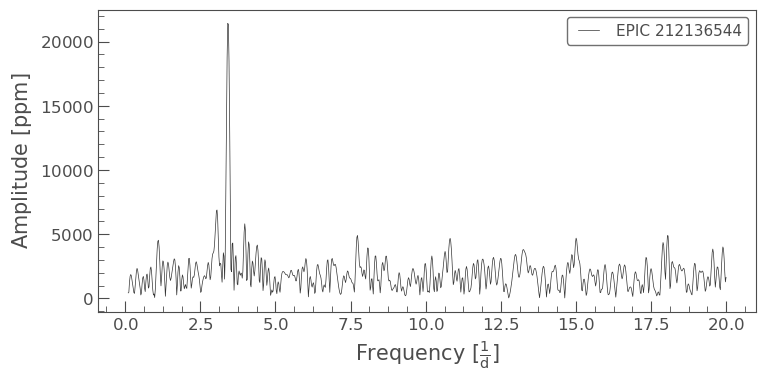

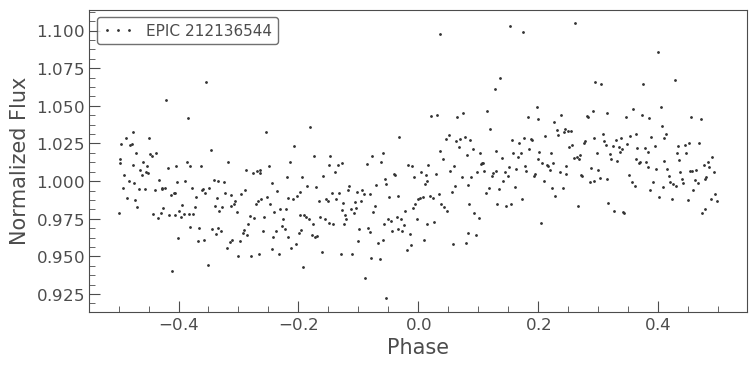

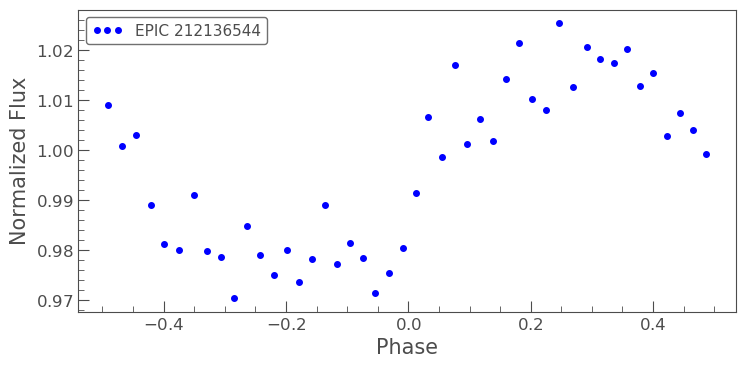

In [25]:
periodogramthird=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[(len(first10time)+len(second10time)+1):(len(first10time)+len(second10time)+len(third10time))], minimum_period=0.05, maximum_period =10)
periodogramthird.plot()
periodogramthird.period_at_max_power

folded_lightcurve_third = clc[(len(first10time)+len(second10time)+1):(len(first10time)+len(second10time)+len(third10time))].fold(periodogramthird.period_at_max_power.value)
folded_lightcurve_third.plot(marker='o',linestyle='none')

bin_folded_lc_third = folded_lightcurve_third.bin(10,method='median')
bin_plot=bin_folded_lc_third.plot(marker='o',linestyle='None',markersize=4,color='blue')

0.02181881079386363


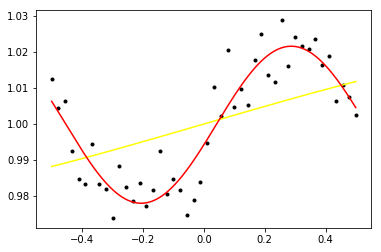

In [26]:
N_third = len(bin_folded_lc_third.flux) # number of data points
t_third = np.linspace(-0.5, 0.5, N_third)
guess_mean_third = np.mean(bin_folded_lc_third.flux)
guess_std_third = 3*np.std(bin_folded_lc_third.flux)/(2**0.5)/(2**0.5)
guess_phase_third = 0
guess_freq_third = 1
guess_amp_third = 1
data_first_guess_third= guess_std_third*np.sin(t_third+guess_phase_third) + guess_mean_third
optimize_func_third = lambda x: x[0]*np.sin(x[1]*t_third+x[2]) + x[3] - bin_folded_lc_third.flux
est_amp_third, est_freq_third, est_phase_third, est_mean_third = leastsq(optimize_func_third, [guess_amp_third, guess_freq_third, guess_phase_third, guess_mean_third])[0]
data_fit_third = est_amp_third*np.sin(est_freq_third*t_third+est_phase_third) + est_mean_third
fine_t_third = np.arange(-0.5,0.5,0.001)
data_fit_third = est_amp_third*np.sin(est_freq_third*fine_t_third+est_phase_third)+est_mean_third
plt.plot(t_third, bin_folded_lc_third.flux, marker='.', linestyle='none', color='black')
plt.plot(t_third, data_first_guess_third, label='first guess', color='yellow')
plt.plot(fine_t_third, data_fit_third, label='after fitting', color='red')
print(est_amp_third)

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

-0.6392315016292955


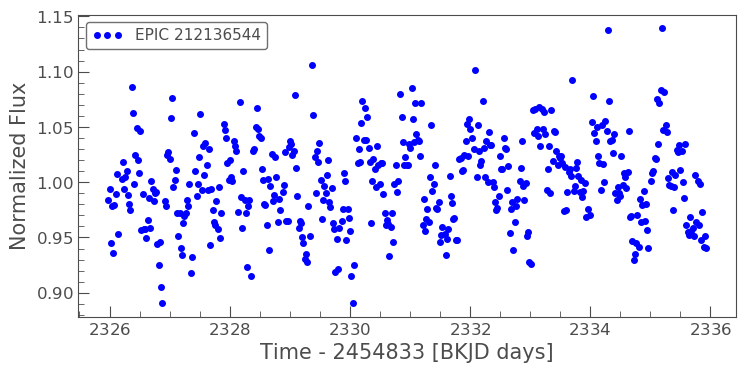

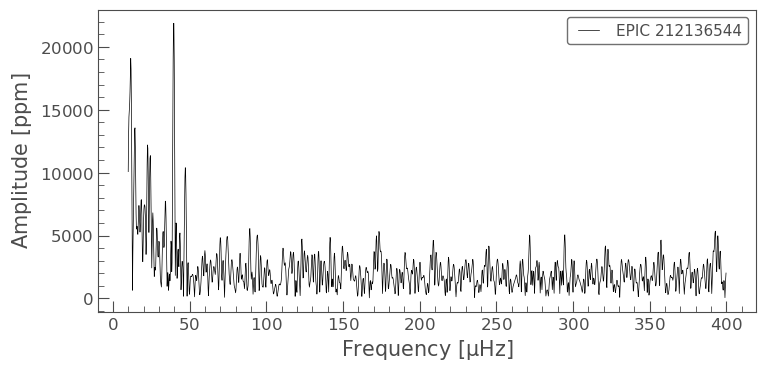

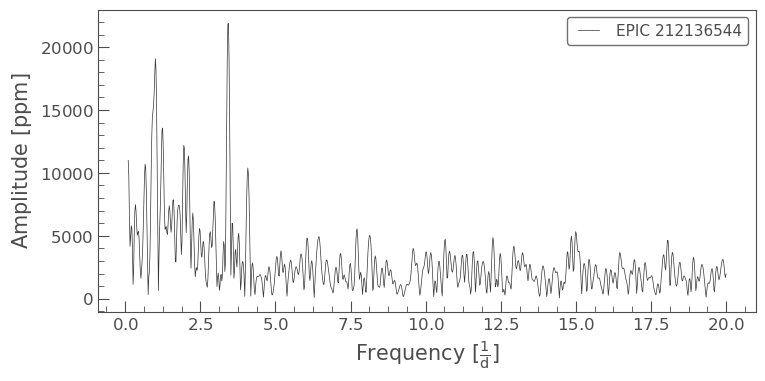

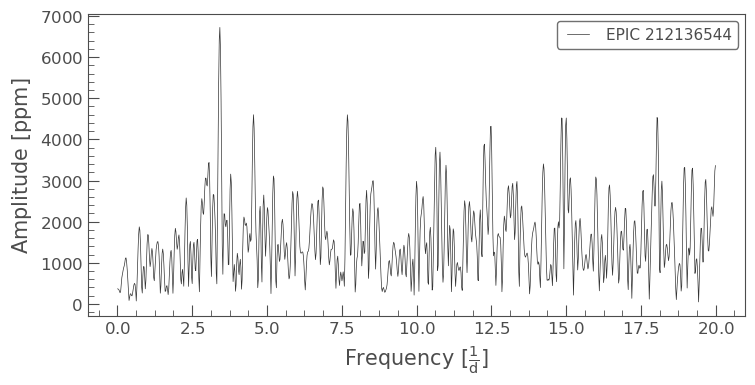

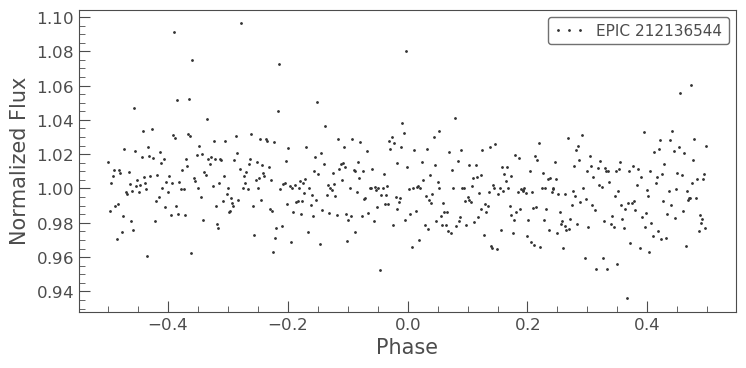

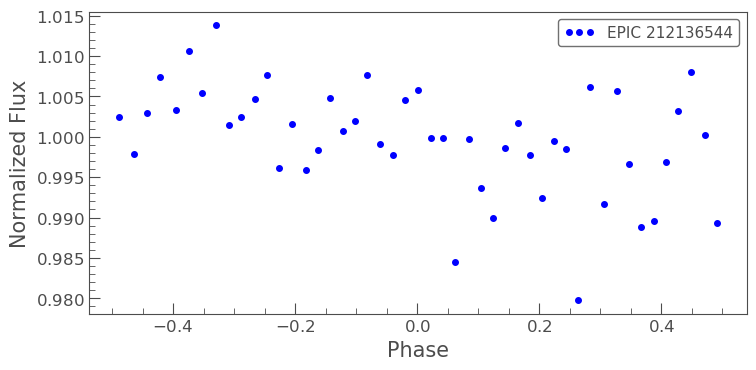

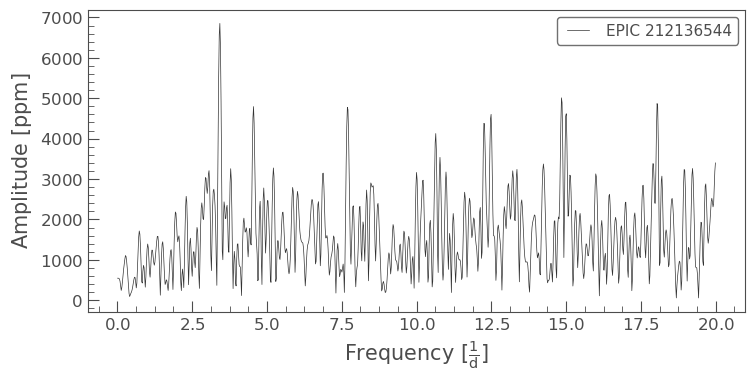

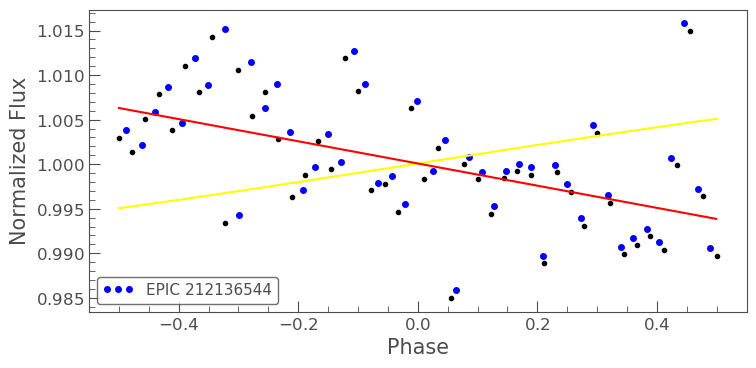

In [27]:
import matplotlib.pyplot as plt

user_lc_third = tpf[901:1370].to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_third = user_lc_third.remove_nans().remove_outliers()
user_lc_third.plot(marker='o',linestyle='None',markersize=4,color='blue')

p = user_lc_third.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
ax = p.plot(c='k');

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc_third, minimum_period=0.05, maximum_period =10)
periodogram.plot()
periodogram.period_at_max_power

lc_third = tpf[901:1370].to_lightcurve().normalize().remove_nans().remove_outliers()
clc_third = lc_third.correct(windows=10).remove_outliers().fill_gaps()
#clc_first.plot()

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc_third, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = clc_third.fold(periodogram.period_at_max_power.value)
folded_lightcurve.plot(marker='o',linestyle='none')

bin_folded_lc_third = folded_lightcurve.bin(10,method='median')
bin_folded_lc_third.plot(marker='o',linestyle='None',markersize=4,color='blue')

corrector=lk.SFFCorrector(lc_third)
new_lc_third = corrector.correct(lc_third.centroid_col,lc_third.centroid_row)

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(new_lc_third, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = new_lc_third.fold(periodogram.period_at_max_power.value)
bin_folded_lc_third = folded_lightcurve.bin(10,method='median')
bin_folded_lc_third.plot(marker='o',linestyle='None',markersize=4,color='blue')

N = len(bin_folded_lc_third.flux) # number of data points
t = np.linspace(-0.5, 0.5, N)
guess_mean = np.mean(bin_folded_lc_third.flux)
guess_std = 3*np.std(bin_folded_lc_third.flux)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_third.flux
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(-0.5,0.5,0.001)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
plt.plot(t, bin_folded_lc_third.flux, marker='.', linestyle='none', color='black')
plt.plot(t, data_first_guess, label='first guess', color='yellow')
plt.plot(fine_t, data_fit, label='after fitting', color='red')
print(est_amp)


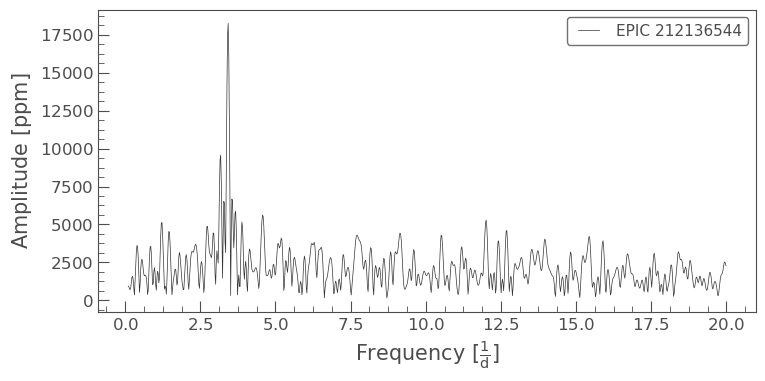

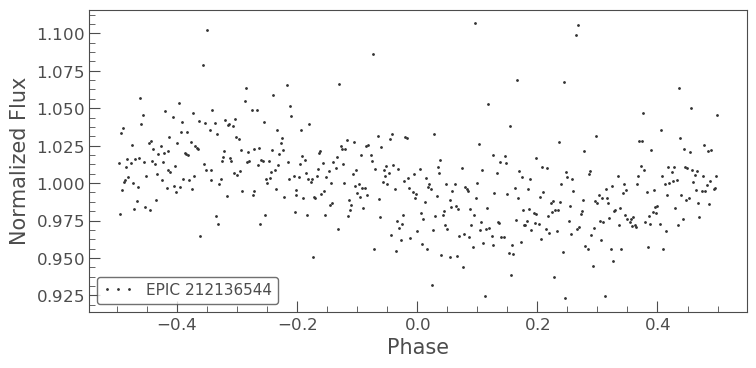

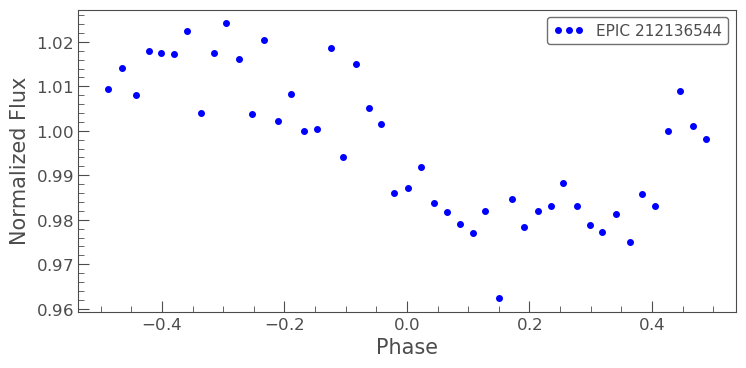

In [74]:
periodogramfourth=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[(len(first10time)+len(second10time)+len(third10time)+1):(len(first10time)+len(second10time)+len(third10time)+len(fourth10time))], minimum_period=0.05, maximum_period =10)
periodogramfourth.plot()
periodogramfourth.period_at_max_power

folded_lightcurve_fourth = clc[(len(first10time)+len(second10time)+len(third10time)+1):(len(first10time)+len(second10time)+len(third10time)+len(fourth10time))].fold(periodogramfourth.period_at_max_power.value)
folded_lightcurve_fourth.plot(marker='o',linestyle='none')

bin_folded_lc_fourth = folded_lightcurve_fourth.bin(10,method='median')
bin_folded_lc_fourth.plot(marker='o',linestyle='None',markersize=4,color='blue')

In [28]:
N_fourth = len(bin_folded_lc_fourth.flux) # number of data points
t_fourth = np.linspace(-0.5, 0.5, N_fourth)
guess_mean_fourth = np.mean(bin_folded_lc_fourth.flux)
guess_std_fourth = 3*np.std(bin_folded_lc_fourth.flux)/(2**0.5)/(2**0.5)
guess_phase_fourth = 0
guess_freq_fourth = 1
guess_amp_fourth = 1
data_first_guess_fourth= guess_std_fourth*np.sin(t_fourth+guess_phase_fourth) + guess_mean_fourth
optimize_func_fourth = lambda x: (x[0]*np.sin(x[1]*t_fourth+x[2]) + x[3] - bin_folded_lc_fourth.flux)**2/sqrt(10)
est_amp_fourth, est_freq_fourth, est_phase_fourth, est_mean_fourth = leastsq(optimize_func_fourth, [guess_amp_fourth, guess_freq_fourth, guess_phase_fourth, guess_mean_fourth])[0]
data_fit_fourth = est_amp_fourth*np.sin(est_freq_fourth*t_fourth+est_phase_fourth) + est_mean_fourth
fine_t_fourth = np.arange(-0.5,0.5,0.001)
data_fit_fourth = est_amp_fourth*np.sin(est_freq_fourth*fine_t_fourth+est_phase_fourth)+est_mean_fourth
plt.plot(t_fourth, bin_folded_lc_fourth.flux, marker='.', linestyle='none', color='black')
plt.plot(t_fourth, data_first_guess_fourth, label='first guess', color='yellow')
plt.plot(fine_t_fourth, data_fit_fourth, label='after fitting', color='red')
print(est_amp_fourth)

NameError: name 'bin_folded_lc_fourth' is not defined

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

0.009102773897252293


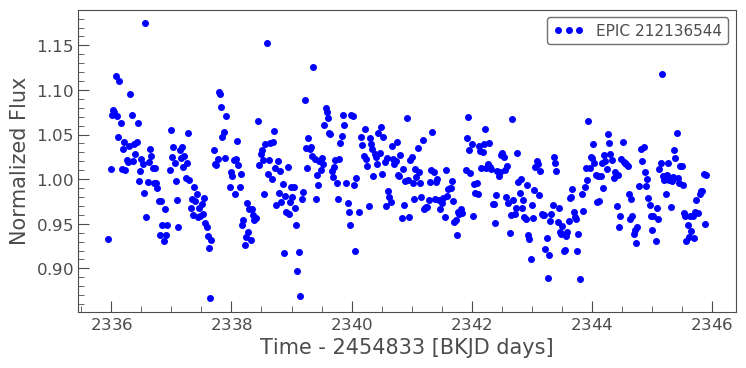

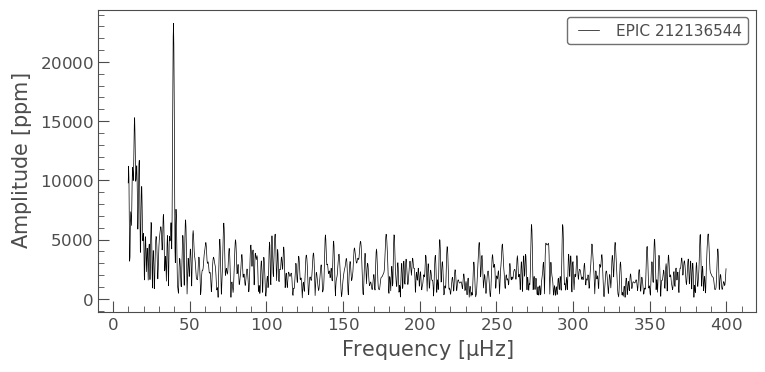

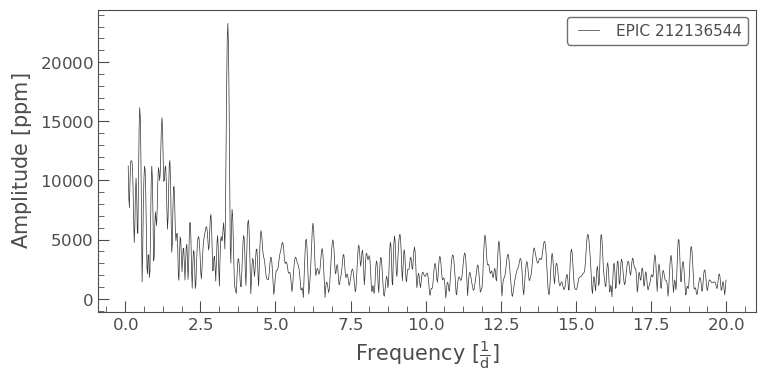

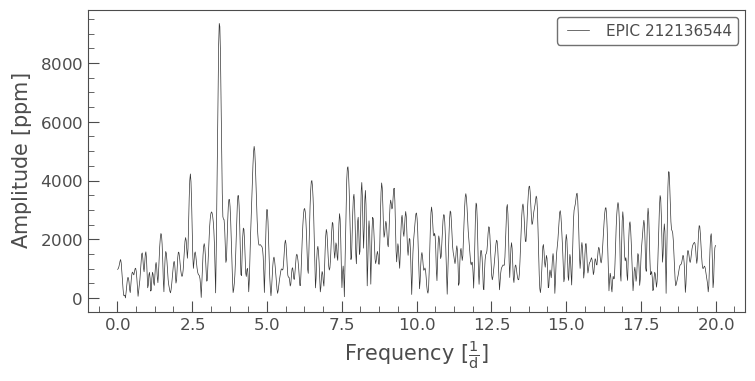

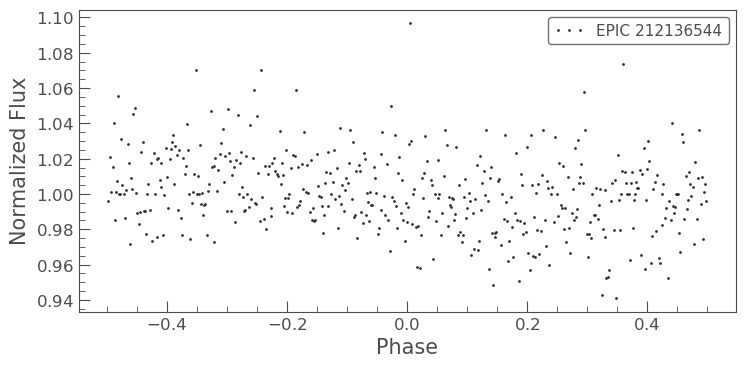

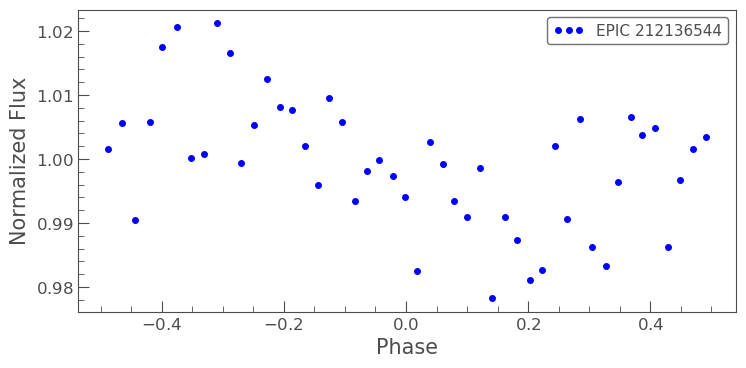

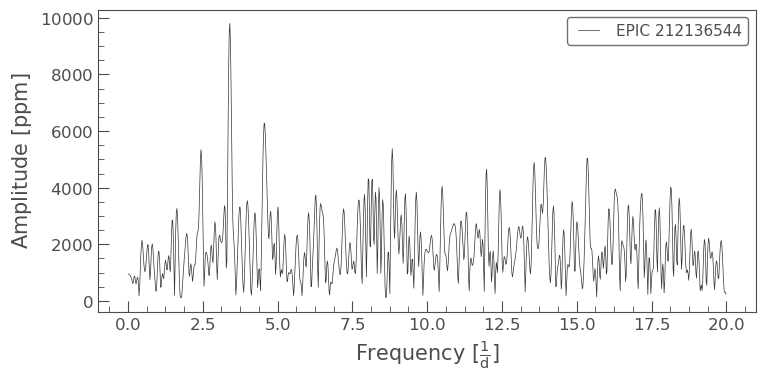

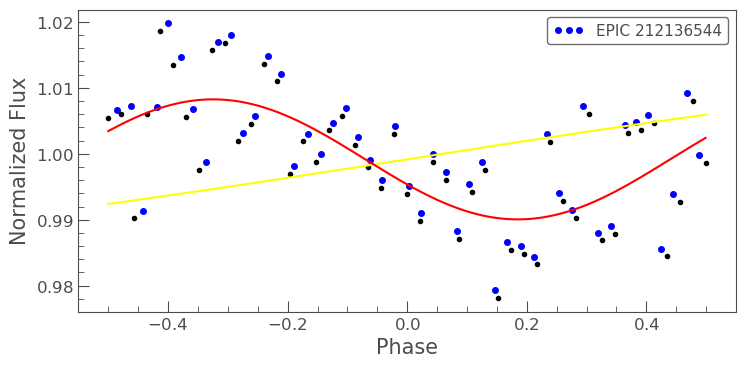

In [18]:
import matplotlib.pyplot as plt

user_lc_fourth = tpf[1370:1843].to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_fourth = user_lc_fourth.remove_nans().remove_outliers()
user_lc_fourth.plot(marker='o',linestyle='None',markersize=4,color='blue')

p = user_lc_fourth.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
ax = p.plot(c='k');

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc_fourth, minimum_period=0.05, maximum_period =10)
periodogram.plot()
periodogram.period_at_max_power

lc_fourth = tpf[1370:1843].to_lightcurve().normalize().remove_nans().remove_outliers()
clc_fourth = lc_fourth.correct(windows=10).remove_outliers().fill_gaps()
#clc_first.plot()

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc_fourth, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = clc_fourth.fold(periodogram.period_at_max_power.value)
folded_lightcurve.plot(marker='o',linestyle='none')

bin_folded_lc_fourth = folded_lightcurve.bin(10,method='median')
bin_folded_lc_fourth.plot(marker='o',linestyle='None',markersize=4,color='blue')

corrector=lk.SFFCorrector(lc_fourth)
new_lc_fourth = corrector.correct(lc_fourth.centroid_col,lc_fourth.centroid_row)

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(new_lc_fourth, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = new_lc_fourth.fold(periodogram.period_at_max_power.value)
bin_folded_lc_fourth = folded_lightcurve.bin(10,method='median')
bin_folded_lc_fourth.plot(marker='o',linestyle='None',markersize=4,color='blue')

N = len(bin_folded_lc_fourth.flux) # number of data points
t = np.linspace(-0.5, 0.5, N)
guess_mean = np.mean(bin_folded_lc_fourth.flux)
guess_std = 3*np.std(bin_folded_lc_fourth.flux)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_fourth.flux
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(-0.5,0.5,0.001)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
plt.plot(t, bin_folded_lc_fourth.flux, marker='.', linestyle='none', color='black')
plt.plot(t, data_first_guess, label='first guess', color='yellow')
plt.plot(fine_t, data_fit, label='after fitting', color='red')
print(est_amp)


-0.02342091364469948


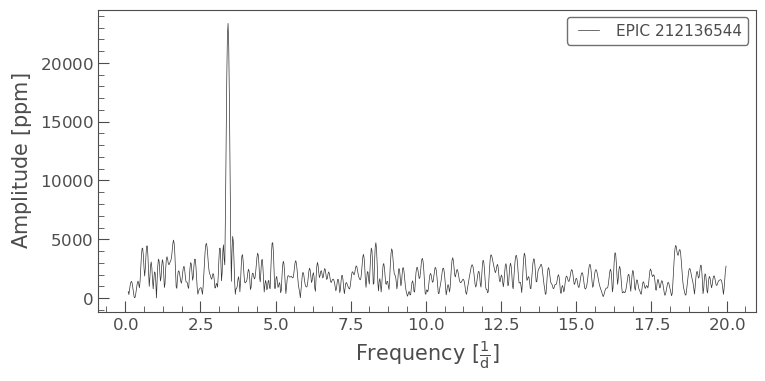

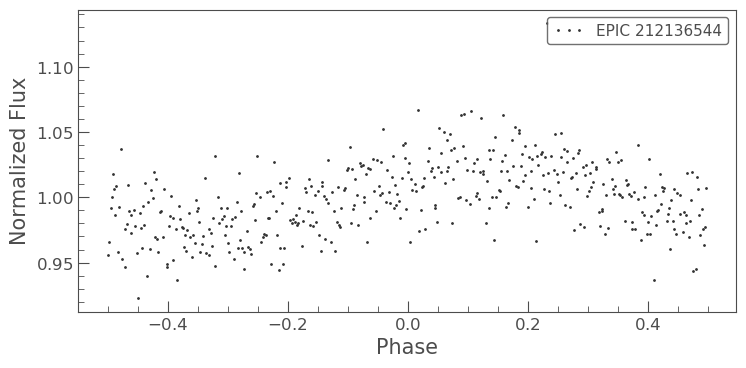

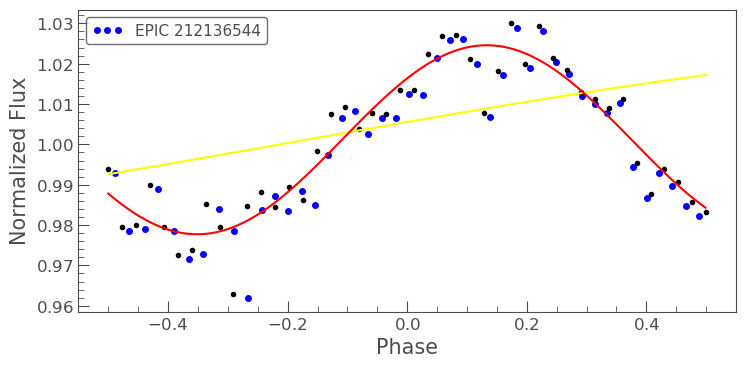

In [29]:
periodogramfifth=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[(len(first10time)+len(second10time)+len(third10time)+len(fourth10time)+1):(len(first10time)+len(second10time)+len(third10time)+len(fourth10time)+len(fifth10time))], minimum_period=0.05, maximum_period =10)
periodogramfifth.plot()
periodogramfifth.period_at_max_power

folded_lightcurve_fifth = clc[(len(first10time)+len(second10time)+len(third10time)+len(fourth10time)+1):(len(first10time)+len(second10time)+len(third10time)+len(fourth10time)+len(fifth10time))].fold(periodogramfifth.period_at_max_power.value)
folded_lightcurve_fifth.plot(marker='o',linestyle='none')

bin_folded_lc_fifth = folded_lightcurve_fifth.bin(10,method='median')
bin_folded_lc_fifth.plot(marker='o',linestyle='None',markersize=4,color='blue')

N_fifth = len(bin_folded_lc_fifth.flux) # number of data points
t_fifth = np.linspace(-0.5, 0.5, N_fifth)
guess_mean_fifth = np.mean(bin_folded_lc_fifth.flux)
guess_std_fifth = 3*np.std(bin_folded_lc_fifth.flux)/(2**0.5)/(2**0.5)
guess_phase_fifth = .2
guess_freq_fifth = 1
guess_amp_fifth = 1
data_first_guess_fifth= guess_std_fifth*np.sin(t_fifth+guess_phase_fifth) + guess_mean_fifth
optimize_func_fifth = lambda x: x[0]*np.sin(x[1]*t_fifth+x[2]) + x[3] - bin_folded_lc_fifth.flux
est_amp_fifth, est_freq_fifth, est_phase_fifth, est_mean_fifth = leastsq(optimize_func_fifth, [guess_amp_fifth, guess_freq_fifth, guess_phase_fifth, guess_mean_fifth])[0]
data_fit_fifth = est_amp_fifth*np.sin(est_freq_fifth*t_fifth+est_phase_fifth) + est_mean_fifth
fine_t_fifth = np.arange(-0.5,0.5,0.001)
data_fit_fifth = est_amp_fifth*np.sin(est_freq_fifth*fine_t_fifth+est_phase_fifth)+est_mean_fifth
plt.plot(t_fifth, bin_folded_lc_fifth.flux, marker='.', linestyle='none', color='black')
plt.plot(t_fifth, data_first_guess_fifth, label='first guess', color='yellow')
plt.plot(fine_t_fifth, data_fit_fifth, label='after fitting', color='red')
print(est_amp_fifth)

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

0.008747637176150624


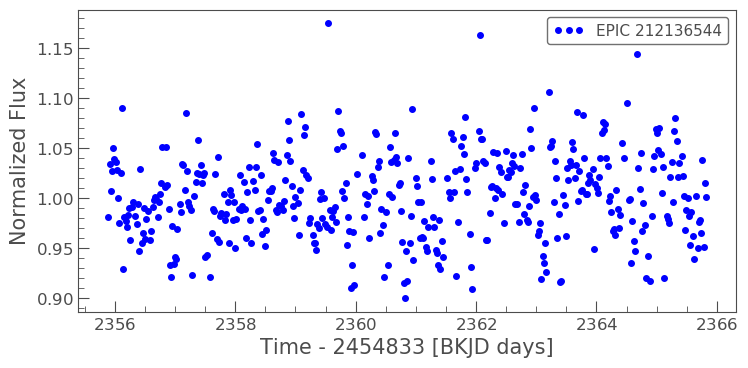

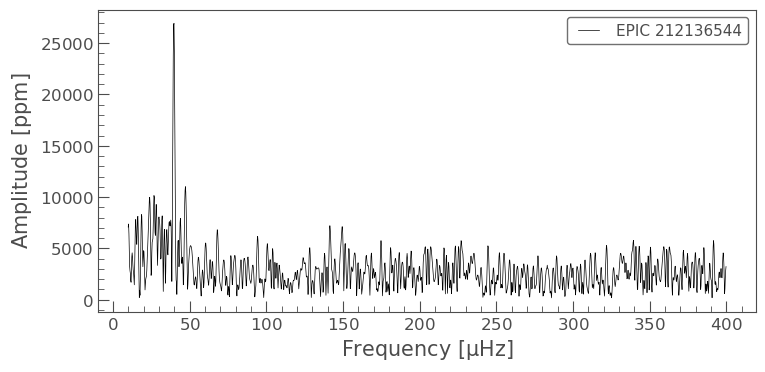

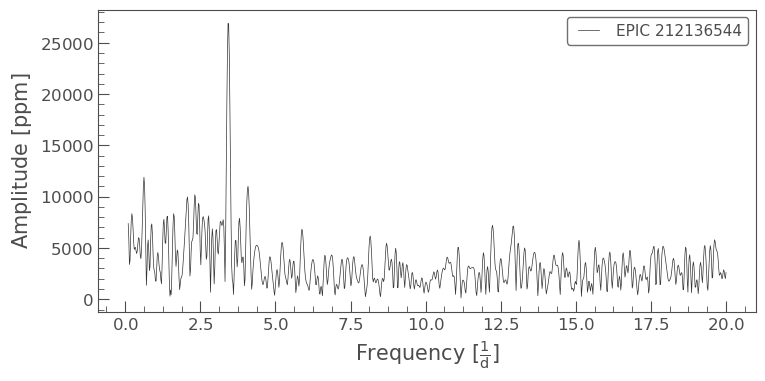

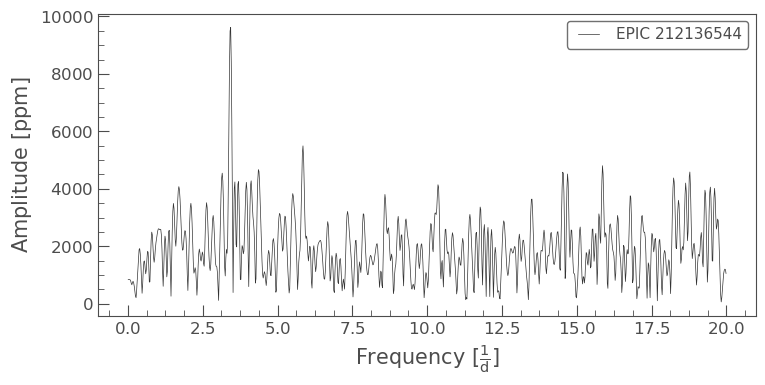

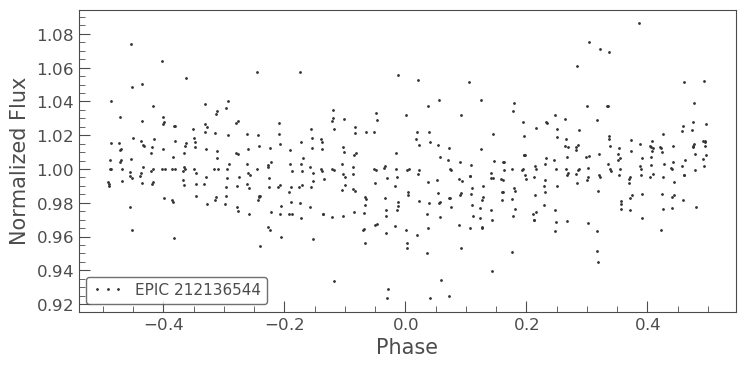

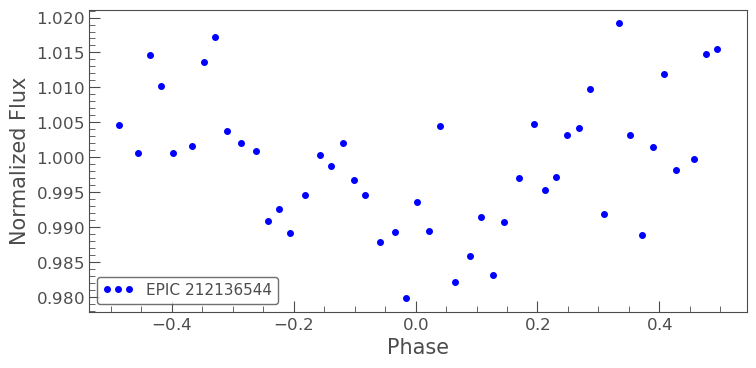

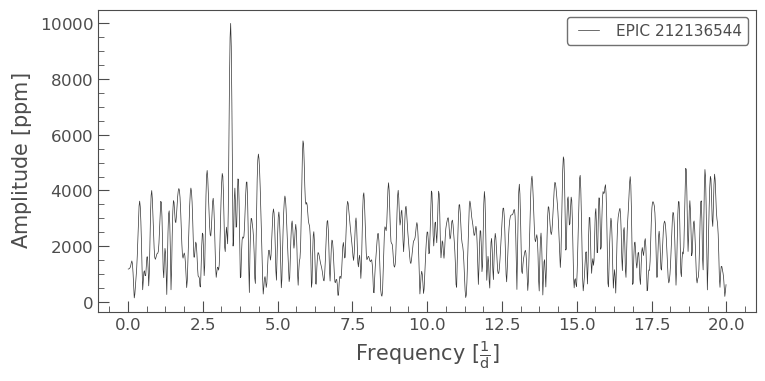

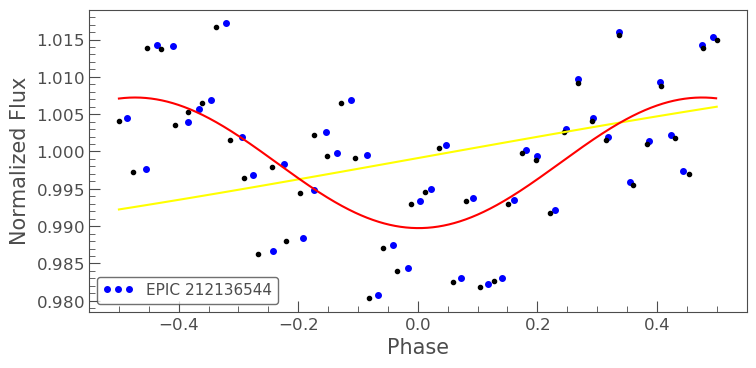

In [20]:
import matplotlib.pyplot as plt

user_lc_fifth = tpf[2292:2737].to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_fifth = user_lc_fifth.remove_nans().remove_outliers()
user_lc_fifth.plot(marker='o',linestyle='None',markersize=4,color='blue')

p = user_lc_fifth.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
ax = p.plot(c='k');

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc_fifth, minimum_period=0.05, maximum_period =10)
periodogram.plot()
periodogram.period_at_max_power

lc_fifth = tpf[2292:2737].to_lightcurve().normalize().remove_nans().remove_outliers()
clc_fifth = lc_fifth.correct(windows=10).remove_outliers().fill_gaps()
#clc_first.plot()

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc_fifth, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = clc_fifth.fold(periodogram.period_at_max_power.value)
folded_lightcurve.plot(marker='o',linestyle='none')

bin_folded_lc_fifth = folded_lightcurve.bin(10,method='median')
bin_folded_lc_fifth.plot(marker='o',linestyle='None',markersize=4,color='blue')

corrector=lk.SFFCorrector(lc_fifth)
new_lc_fifth = corrector.correct(lc_fifth.centroid_col,lc_fifth.centroid_row)

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(new_lc_fifth, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = new_lc_fifth.fold(periodogram.period_at_max_power.value)
bin_folded_lc_fifth = folded_lightcurve.bin(10,method='median')
bin_folded_lc_fifth.plot(marker='o',linestyle='None',markersize=4,color='blue')

N = len(bin_folded_lc_fifth.flux) # number of data points
t = np.linspace(-0.5, 0.5, N)
guess_mean = np.mean(bin_folded_lc_fifth.flux)
guess_std = 3*np.std(bin_folded_lc_fifth.flux)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_fifth.flux
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(-0.5,0.5,0.001)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
plt.plot(t, bin_folded_lc_fifth.flux, marker='.', linestyle='none', color='black')
plt.plot(t, data_first_guess, label='first guess', color='yellow')
plt.plot(fine_t, data_fit, label='after fitting', color='red')
print(est_amp)


<Quantity 0.29287156 d>

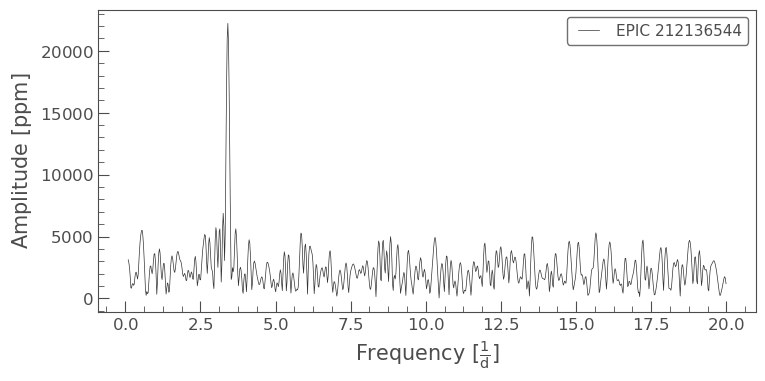

In [32]:
periodogramsixth=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[(len(first10time)+len(second10time)+len(third10time)+len(fourth10time)+len(fifth10time)+1):(len(first10time)+len(second10time)+len(third10time)+len(fourth10time)+len(fifth10time)+len(sixth10time))], minimum_period=0.05, maximum_period =10)
periodogramsixth.plot()
periodogramsixth.period_at_max_power

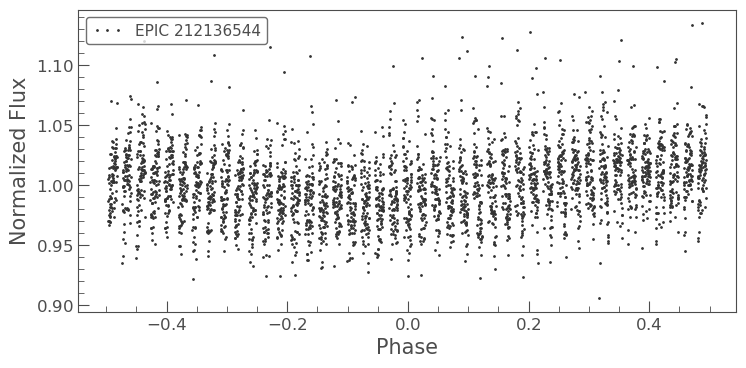

In [33]:
folded_lightcurve_sixth = clc.fold(periodogramsixth.period_at_max_power.value)
folded_lightcurve_sixth.plot(marker='o',linestyle='none')

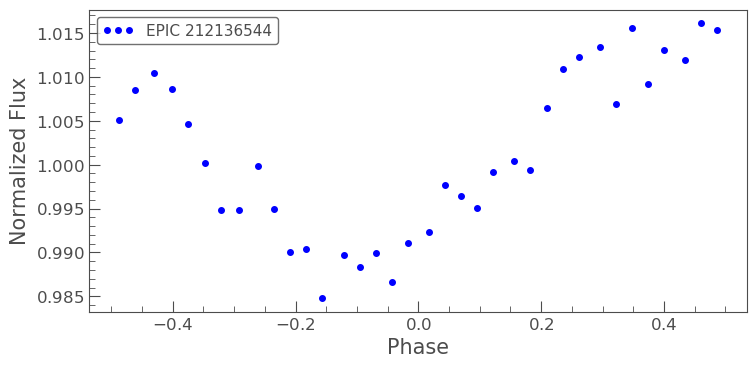

In [34]:
bin_folded_lc_sixth = folded_lightcurve_sixth.bin(100,method='median')
bin_folded_lc_sixth.plot(marker='o',linestyle='None',markersize=4,color='blue')

0.012609142395044171


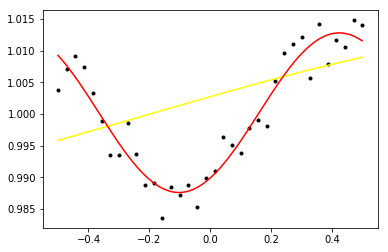

In [37]:
N_sixth = len(bin_folded_lc_sixth.flux) # number of data points
t_sixth = np.linspace(-0.5, 0.5, N_sixth)
guess_mean_sixth = np.mean(bin_folded_lc_sixth.flux)
guess_std_sixth = 3*np.std(bin_folded_lc_sixth.flux)/(2**0.5)/(2**0.5)
guess_phase_sixth = .2
guess_freq_sixth = 1
guess_amp_sixth = 1
data_first_guess_sixth= guess_std_sixth*np.sin(t_sixth+guess_phase_sixth) + guess_mean_sixth
optimize_func_sixth = lambda x: x[0]*np.sin(x[1]*t_sixth+x[2]) + x[3] - bin_folded_lc_sixth.flux
est_amp_sixth, est_freq_sixth, est_phase_sixth, est_mean_sixth = leastsq(optimize_func_sixth, [guess_amp_sixth, guess_freq_sixth, guess_phase_sixth, guess_mean_sixth])[0]
data_fit_sixth = est_amp_sixth*np.sin(est_freq_sixth*t_sixth+est_phase_sixth) + est_mean_sixth
fine_t_sixth = np.arange(-0.5,0.5,0.001)
data_fit_sixth = est_amp_sixth*np.sin(est_freq_sixth*fine_t_sixth+est_phase_sixth)+est_mean_sixth
plt.plot(t_sixth, bin_folded_lc_sixth.flux, marker='.', linestyle='none', color='black')
plt.plot(t_sixth, data_first_guess_sixth, label='first guess', color='yellow')
plt.plot(fine_t_sixth, data_fit_sixth, label='after fitting', color='red')
print(est_amp_sixth)

In [ ]:
import matplotlib.pyplot as plt

user_lc_sixth = tpf[2292:2292].to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_sixth = user_lc_fifth.remove_nans().remove_outliers()
user_lc_sixth.plot(marker='o',linestyle='None',markersize=4,color='blue')

p = user_lc_sixth.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
ax = p.plot(c='k');

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc_sixth, minimum_period=0.05, maximum_period =10)
periodogram.plot()
periodogram.period_at_max_power

lc_sixth = tpf[1843:2292].to_lightcurve().normalize().remove_nans().remove_outliers()
clc_sixth = lc_sixth.correct(windows=10).remove_outliers().fill_gaps()
#clc_first.plot()

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc_sixth, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = clc_sixth.fold(periodogram.period_at_max_power.value)
folded_lightcurve.plot(marker='o',linestyle='none')

bin_folded_lc_sixth = folded_lightcurve.bin(10,method='median')
bin_folded_lc_sixth.plot(marker='o',linestyle='None',markersize=4,color='blue')

corrector=lk.SFFCorrector(lc_sixth)
new_lc_sixth = corrector.correct(lc_sixth.centroid_col,lc_sixth.centroid_row)

periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(new_lc_sixth, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

folded_lightcurve = new_lc_sixth.fold(periodogram.period_at_max_power.value)
bin_folded_lc_sixth = folded_lightcurve.bin(10,method='median')
bin_folded_lc_sixth.plot(marker='o',linestyle='None',markersize=4,color='blue')

N = len(bin_folded_lc_sixth.flux) # number of data points
t = np.linspace(-0.5, 0.5, N)
guess_mean = np.mean(bin_folded_lc_sixth.flux)
guess_std = 3*np.std(bin_folded_lc_sixth.flux)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_sixth.flux
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(-0.5,0.5,0.001)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
plt.plot(t, bin_folded_lc_sixth.flux, marker='.', linestyle='none', color='black')
plt.plot(t, data_first_guess, label='first guess', color='yellow')
plt.plot(fine_t, data_fit, label='after fitting', color='red')
print(est_amp)


<Quantity 0.17089264 d>

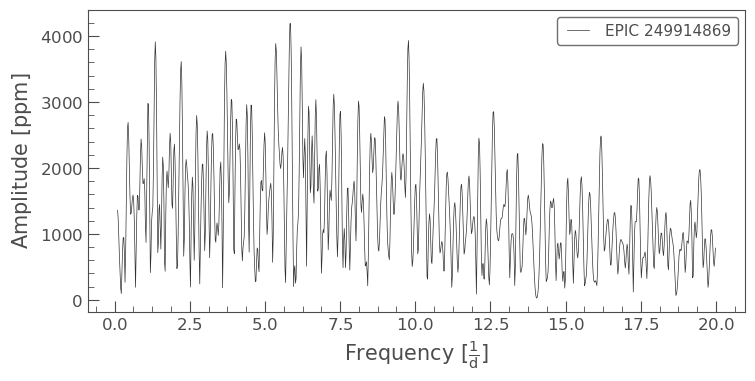

In [113]:
periodogramseventh=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[84653:98950], minimum_period=0.05, maximum_period =10)
periodogramseventh.plot()
periodogramseventh.period_at_max_power

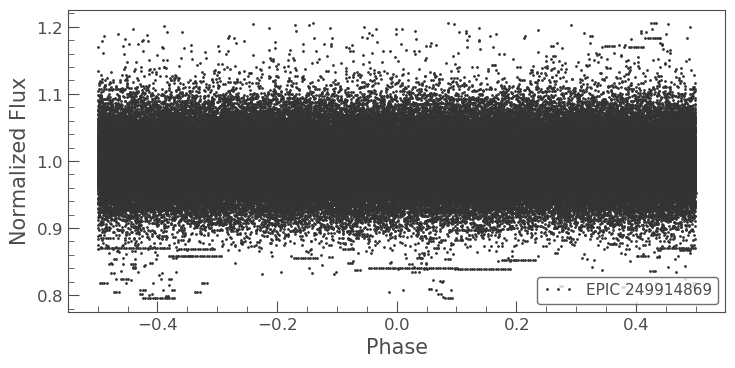

In [131]:
folded_lightcurve_seventh = clc.fold(periodogramseventh.period_at_max_power.value)
folded_lightcurve_seventh.plot(marker='o',linestyle='none')

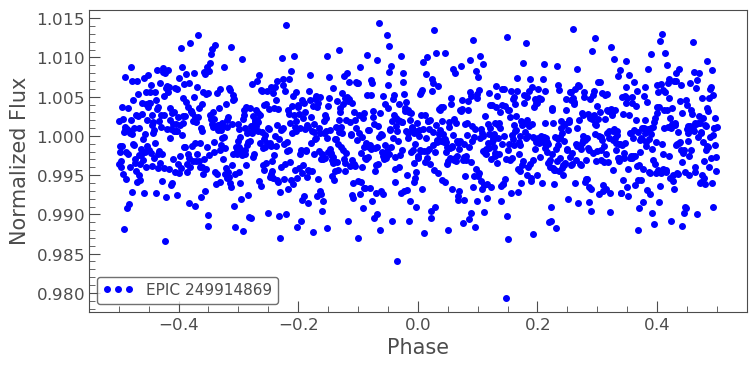

In [164]:
bin_folded_lc_seventh = folded_lightcurve_seventh.bin(100,method='median')
bin_folded_lc_seventh.plot(marker='o',linestyle='None',markersize=4,color='blue')

0.0030867319906878383


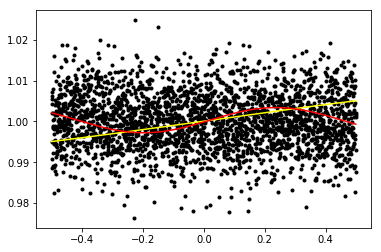

In [158]:
N_seventh = len(bin_folded_lc_seventh.flux) # number of data points
t_seventh = np.linspace(-0.5, 0.5, N_seventh)
guess_mean_seventh = np.mean(bin_folded_lc_seventh.flux)
guess_std_seventh = 3*np.std(bin_folded_lc_seventh.flux)/(2**0.5)/(2**0.5)
guess_phase_seventh = 0
guess_freq_seventh = 1
guess_amp_seventh = 1
data_first_guess_seventh= guess_std_seventh*np.sin(t_seventh+guess_phase_seventh) + guess_mean_seventh
optimize_func_seventh = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_seventh.flux
est_amp_seventh, est_freq_seventh, est_phase_seventh, est_mean_seventh = leastsq(optimize_func, [guess_amp_seventh, guess_freq_seventh, guess_phase_seventh, guess_mean_seventh])[0]
data_fit_seventh = est_amp_seventh*np.sin(est_freq_seventh*t_seventh+est_phase_seventh) + est_mean_seventh
fine_t_seventh = np.arange(-0.5,0.5,0.001)
data_fit_seventh = est_amp_seventh*np.sin(est_freq_seventh*fine_t_seventh+est_phase_seventh)+est_mean_seventh
plt.plot(t_seventh, bin_folded_lc_seventh.flux, marker='.', linestyle='none', color='black')
plt.plot(t_seventh, data_first_guess_seventh, label='first guess', color='yellow')
plt.plot(fine_t_seventh, data_fit_seventh, label='after fitting', color='red')
print(est_amp_seventh)

<Quantity 2.04529517 d>

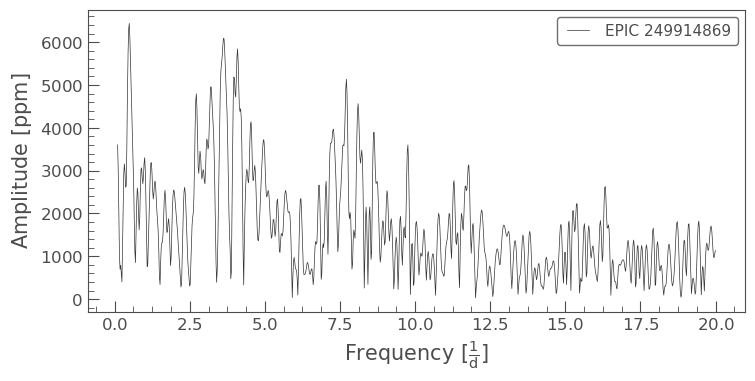

In [114]:
periodogrameighth=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[98951:113298], minimum_period=0.05, maximum_period =10)
periodogrameighth.plot()
periodogrameighth.period_at_max_power

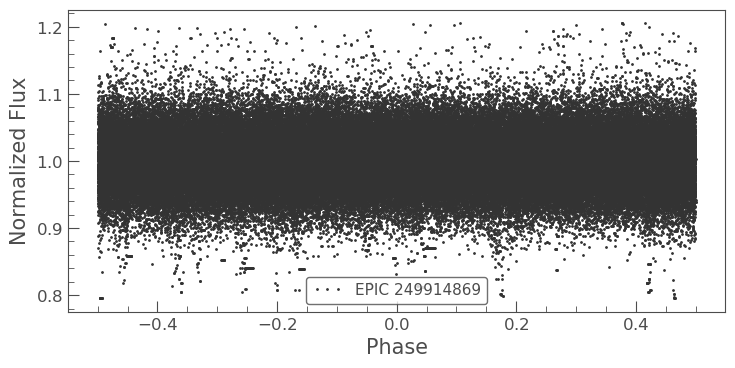

In [133]:
folded_lightcurve_eighth = clc.fold(periodogrameighth.period_at_max_power.value)
folded_lightcurve_eighth.plot(marker='o',linestyle='none')

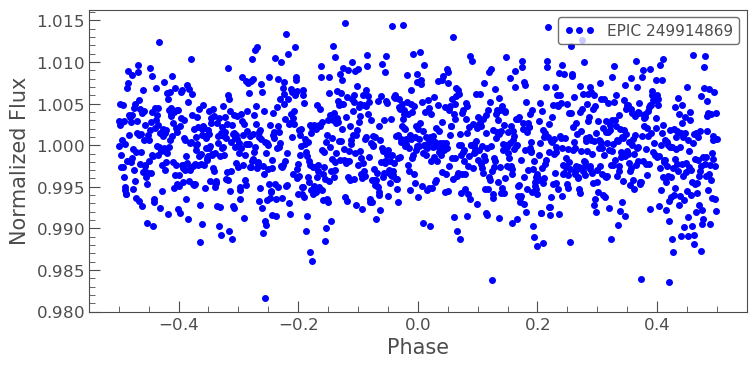

In [163]:
bin_folded_lc_eighth = folded_lightcurve_eighth.bin(100,method='median')
bin_folded_lc_eighth.plot(marker='o',linestyle='None',markersize=4,color='blue')

0.0030867277488930765


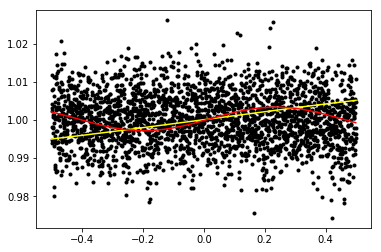

In [159]:
N_eighth = len(bin_folded_lc_eighth.flux) # number of data points
t_eighth = np.linspace(-0.5, 0.5, N_eighth)
guess_mean_eighth = np.mean(bin_folded_lc_eighth.flux)
guess_std_eighth = 3*np.std(bin_folded_lc_eighth.flux)/(2**0.5)/(2**0.5)
guess_phase_eighth = 0
guess_freq_eighth = 1
guess_amp_eighth = 1
data_first_guess_eighth= guess_std_eighth*np.sin(t_eighth+guess_phase_eighth) + guess_mean_eighth
optimize_func_eighth = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_eighth.flux
est_amp_eighth, est_freq_eighth, est_phase_eighth, est_mean_eighth = leastsq(optimize_func, [guess_amp_eighth, guess_freq_eighth, guess_phase_eighth, guess_mean_eighth])[0]
data_fit_eighth = est_amp_eighth*np.sin(est_freq_eighth*t_eighth+est_phase_eighth) + est_mean_eighth
fine_t_eighth = np.arange(-0.5,0.5,0.001)
data_fit_eighth = est_amp_eighth*np.sin(est_freq_eighth*fine_t_eighth+est_phase_eighth)+est_mean_eighth
plt.plot(t_eighth, bin_folded_lc_eighth.flux, marker='.', linestyle='none', color='black')
plt.plot(t_eighth, data_first_guess_eighth, label='first guess', color='yellow')
plt.plot(fine_t_eighth, data_fit_eighth, label='after fitting', color='red')
print(est_amp_eighth)

<Quantity 0.10250996 d>

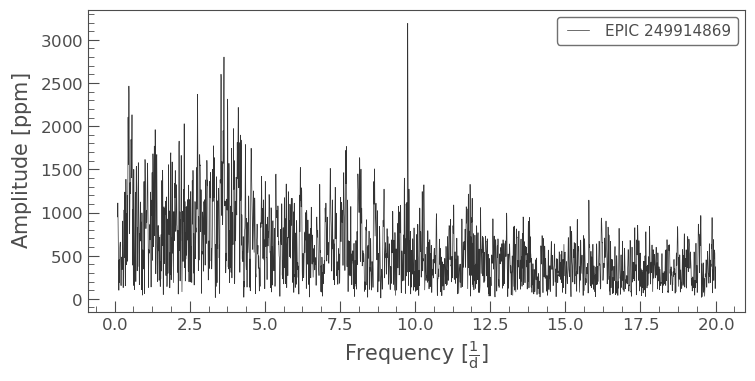

In [115]:
periodogramninth=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc[55612:126784], minimum_period=0.05, maximum_period =10)
periodogramninth.plot()
periodogramninth.period_at_max_power

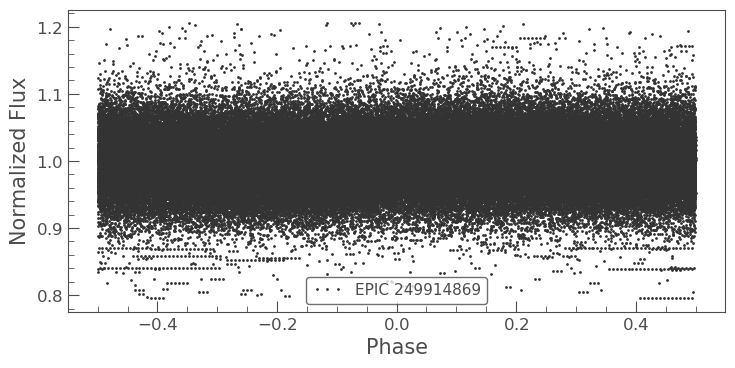

In [135]:
folded_lightcurve_ninth = clc.fold(periodogramninth.period_at_max_power.value)
folded_lightcurve_ninth.plot(marker='o',linestyle='none')

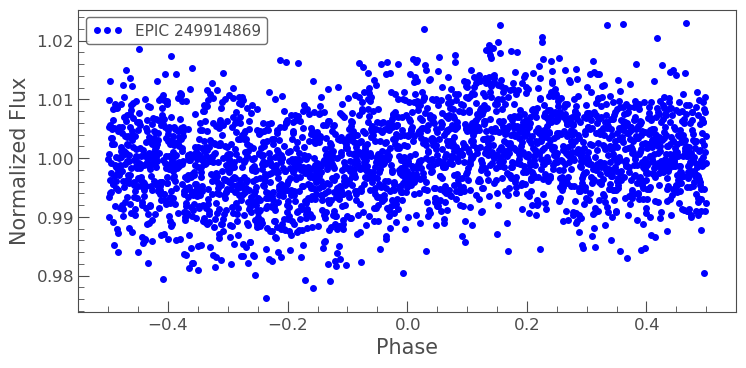

In [136]:
bin_folded_lc_ninth = folded_lightcurve_ninth.bin(50,method='median')
bin_folded_lc_ninth.plot(marker='o',linestyle='None',markersize=4,color='blue')

0.003086726827505986


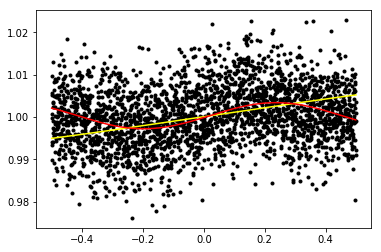

In [162]:
N_ninth = len(bin_folded_lc_ninth.flux) # number of data points
t_ninth = np.linspace(-0.5, 0.5, N_ninth)
guess_mean_ninth = np.mean(bin_folded_lc_ninth.flux)
guess_std_ninth = 3*np.std(bin_folded_lc_ninth.flux)/(2**0.5)/(2**0.5)
guess_phase_ninth = 0
guess_freq_ninth = 1
guess_amp_ninth = 1
data_first_guess_ninth= guess_std_ninth*np.sin(t_ninth+guess_phase_ninth) + guess_mean_ninth
optimize_func_ninth = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_ninth.flux
est_amp_ninth, est_freq_ninth, est_phase_ninth, est_mean_ninth = leastsq(optimize_func, [guess_amp_ninth, guess_freq_ninth, guess_phase_ninth, guess_mean_ninth])[0]
data_fit_ninth = est_amp_ninth*np.sin(est_freq_ninth*t_ninth+est_phase_ninth) + est_mean_ninth
fine_t_ninth = np.arange(-0.5,0.5,0.001)
data_fit_ninth = est_amp_ninth*np.sin(est_freq_ninth*fine_t_ninth+est_phase_ninth)+est_mean_ninth
plt.plot(t_ninth, bin_folded_lc_ninth.flux, marker='.', linestyle='none', color='black')
plt.plot(t_ninth, data_first_guess_ninth, label='first guess', color='yellow')
plt.plot(fine_t_ninth, data_fit_ninth, label='after fitting', color='red')
print(est_amp_ninth)

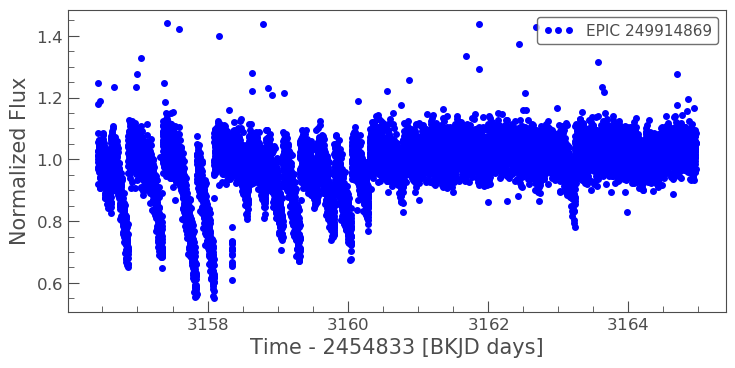

In [198]:
import matplotlib.pyplot as plt

user_lc_first = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
# Clean the light curve
user_lc_first = user_lc[1:12434].remove_nans().remove_outliers()
user_lc.plot(marker='o',linestyle='None',markersize=4,color='blue')

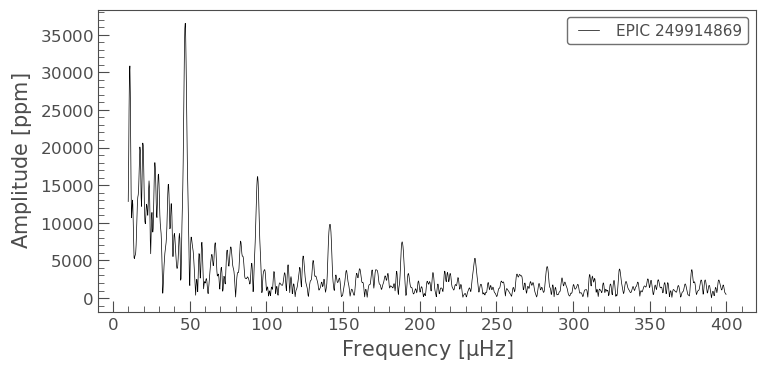

In [199]:
p = user_lc_first.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
ax = p.plot(c='k');

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)


<Quantity 10. d>

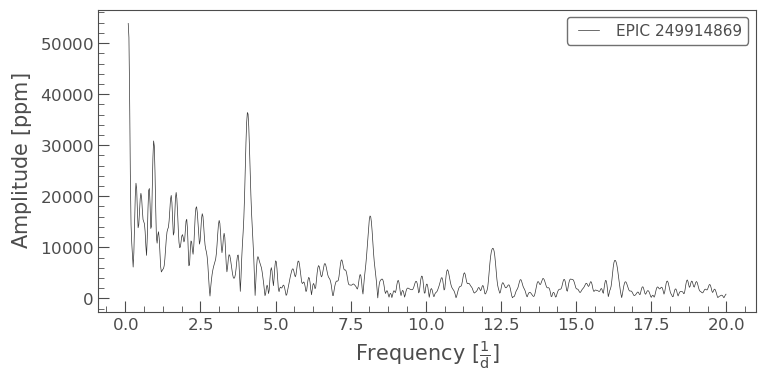

In [200]:
periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc_first, minimum_period=0.05, maximum_period =10)
periodogram.plot()
periodogram.period_at_max_power

/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)


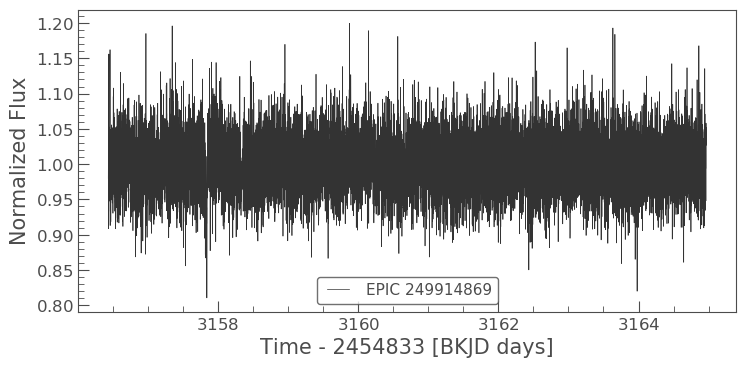

In [206]:
lc_first = tpf[1:12434].to_lightcurve().normalize().remove_nans().remove_outliers()
clc_first = lc_first.correct(windows=10).remove_outliers().fill_gaps()
clc_first.plot()

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)


<Quantity 0.11543646 d>

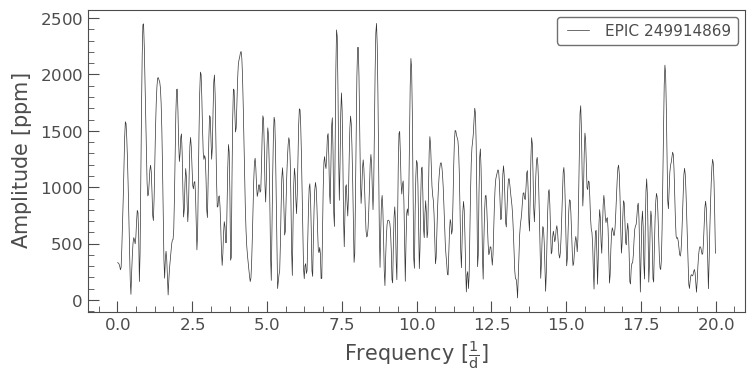

In [207]:
periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc_first, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

In [216]:
folded_lightcurve = clc_first.fold(periodogram.period_at_max_power.value)
#folded_lightcurve.plot(marker='o',linestyle='none')

In [217]:
bin_folded_lc_first = folded_lightcurve.bin(10,method='median')
#bin_folded_lc_first.plot(marker='o',linestyle='None',markersize=4,color='blue')

In [211]:
corrector=lk.SFFCorrector(lc_first)
new_lc_first = corrector.correct(lc_first.centroid_col,lc_first.centroid_row)

/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)


<Quantity 1.13944222 d>

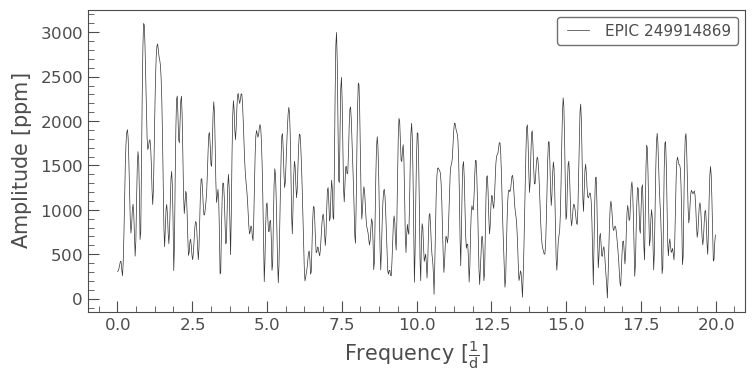

In [212]:
periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(new_lc_first, minimum_period=0.05, maximum_period =100)
periodogram.plot()
periodogram.period_at_max_power

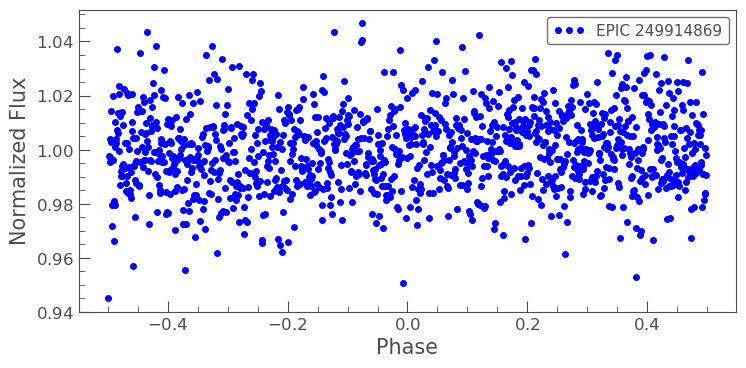

In [213]:
folded_lightcurve = new_lc_first.fold(periodogram.period_at_max_power.value)
bin_folded_lc_first = folded_lightcurve.bin(10,method='median')
bin_folded_lc_first.plot(marker='o',linestyle='None',markersize=4,color='blue')

-0.0021470396761173773


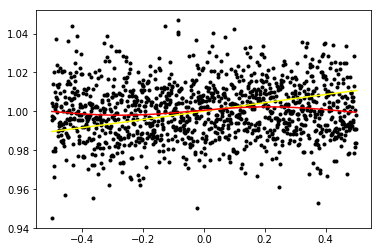

In [215]:
N = len(bin_folded_lc_first.flux) # number of data points
t = np.linspace(-0.5, 0.5, N)
guess_mean = np.mean(bin_folded_lc_first.flux)
guess_std = 3*np.std(bin_folded_lc_first.flux)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - bin_folded_lc_first.flux
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(-0.5,0.5,0.001)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
plt.plot(t, bin_folded_lc_first.flux, marker='.', linestyle='none', color='black')
plt.plot(t, data_first_guess, label='first guess', color='yellow')
plt.plot(fine_t, data_fit, label='after fitting', color='red')
print(est_amp)